In [1]:
import os
from itertools import islice

In [2]:
datafolder = './driving_dataset'

In [3]:
pwd

'C:\\Users\\srini\\OneDrive\\Desktop\\sd'

In [4]:
from scipy import pi
import numpy as np

In [5]:
trainfile = os.path.join(datafolder,'data.txt')

x = []
y = []

with open(trainfile) as fp:
    for line in islice(fp,None):
        path,angle = line.strip().split()
        
        fullpath = os.path.join(datafolder,path)
        
        x.append(fullpath)
        y.append(float(angle)*pi/100)

In [6]:
y = np.array(y)

In [7]:
y

array([0.        , 0.        , 0.        , ..., 0.06974336, 0.06974336,
       0.        ])

In [8]:
len(y)

45406

In [9]:
split_index = int(0.8*len(y))

In [10]:
trainy = y[:split_index]
testy = y[split_index:]

In [11]:
len(testy)

9082

In [12]:
import matplotlib.pyplot as plt

(array([  26.,   12.,   23.,   23.,   16.,   25.,    7.,    4.,    7.,
           3.,    3.,    5.,    4.,    4.,    4.,    5.,    5.,   17.,
          18.,   21.,   67.,   41.,   17.,   19.,   15.,   15.,   16.,
          24.,   25.,  152.,  280.,  126.,  325.,  759., 2609.,  944.,
        1806.,  727.,  245.,  258.,  132.,   30.,   20.,   53.,   75.,
          46.,    6.,    4.,    5.,    9.]),
 array([-5.02434913, -4.87773728, -4.73112544, -4.58451359, -4.43790175,
        -4.2912899 , -4.14467806, -3.99806621, -3.85145436, -3.70484252,
        -3.55823067, -3.41161883, -3.26500698, -3.11839513, -2.97178329,
        -2.82517144, -2.6785596 , -2.53194775, -2.3853359 , -2.23872406,
        -2.09211221, -1.94550037, -1.79888852, -1.65227667, -1.50566483,
        -1.35905298, -1.21244114, -1.06582929, -0.91921744, -0.7726056 ,
        -0.62599375, -0.47938191, -0.33277006, -0.18615821, -0.03954637,
         0.10706548,  0.25367732,  0.40028917,  0.54690102,  0.69351286,
         0.84012

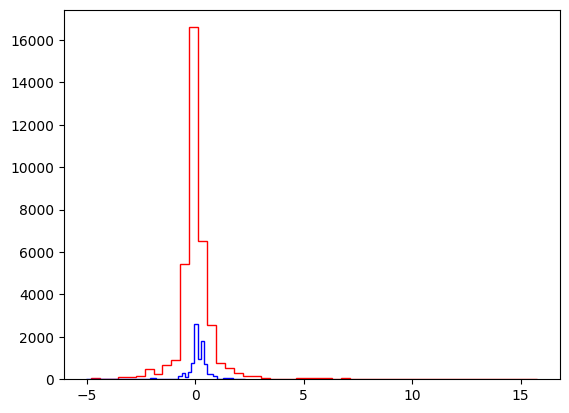

In [13]:
plt.hist(trainy,color="red",bins = 50, histtype = "step")
plt.hist(testy,color="blue",bins = 50, histtype = "step")

In [14]:
train_meany = np.mean(trainy)

In [15]:
train_meany

0.062277974822901046

In [16]:
np.mean(np.square(testy - train_meany))

0.6192510707709883

In [17]:
np.mean(np.square(testy - 0.00))

0.6184869809073972

In [18]:
import os
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.core.protobuf import saver_pb2
import driving_data
import model

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
LOGDIR = './save'

sess = tf.InteractiveSession()

L2NormConst = 0.001

train_vars = tf.trainable_variables()

loss = tf.reduce_mean(tf.square(tf.subtract(model.y_, model.y))) + tf.add_n([tf.nn.l2_loss(v) for v in train_vars]) * L2NormConst
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)
sess.run(tf.global_variables_initializer())

# create a summary to monitor cost tensor
tf.summary.scalar("loss", loss)
# merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()

saver = tf.train.Saver(write_version = saver_pb2.SaverDef.V2)

# op to write logs to Tensorboard
logs_path = './logs'
summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

epochs = 30
batch_size = 100

# train over the dataset about 30 times
for epoch in range(epochs):
    for i in range(int(driving_data.num_images/batch_size)):
        xs, ys = driving_data.LoadTrainBatch(batch_size)
        train_step.run(feed_dict={model.x: xs, model.y_: ys, model.keep_prob: 0.8})
        if i % 10 == 0:
            xs, ys = driving_data.LoadValBatch(batch_size)
            loss_value = loss.eval(feed_dict={model.x:xs, model.y_: ys, model.keep_prob: 1.0})
            print("Epoch: %d, Step: %d, Loss: %g" % (epoch, epoch * batch_size + i, loss_value))

        # write logs at every iteration
        summary = merged_summary_op.eval(feed_dict={model.x:xs, model.y_: ys, model.keep_prob: 1.0})
        summary_writer.add_summary(summary, epoch * driving_data.num_images/batch_size + i)

        if i % batch_size == 0:
            if not os.path.exists(LOGDIR):
                os.makedirs(LOGDIR)
        checkpoint_path = os.path.join(LOGDIR, "model.ckpt")
        filename = saver.save(sess, checkpoint_path)
    print("Model saved in file: %s" % filename)

print("Run the command line:\n" \
      "--> tensorboard --logdir=./logs " \
      "\nThen open http://0.0.0.0:6006/ into your web browser")

Epoch: 0, Step: 0, Loss: 6.56559
Epoch: 0, Step: 10, Loss: 6.31053
Epoch: 0, Step: 20, Loss: 6.27948
Epoch: 0, Step: 30, Loss: 6.38658
Epoch: 0, Step: 40, Loss: 6.16042
Epoch: 0, Step: 50, Loss: 6.17584
Epoch: 0, Step: 60, Loss: 6.08658
Epoch: 0, Step: 70, Loss: 6.21422
Epoch: 0, Step: 80, Loss: 5.88696
Epoch: 0, Step: 90, Loss: 6.21974
Epoch: 0, Step: 100, Loss: 6.04448
Epoch: 0, Step: 110, Loss: 5.7056
Epoch: 0, Step: 120, Loss: 5.73935
Epoch: 0, Step: 130, Loss: 6.03295
Epoch: 0, Step: 140, Loss: 5.78953
Epoch: 0, Step: 150, Loss: 5.52158
Epoch: 0, Step: 160, Loss: 5.84195
Epoch: 0, Step: 170, Loss: 5.39036
Epoch: 0, Step: 180, Loss: 5.41884
Epoch: 0, Step: 190, Loss: 5.29146
Epoch: 0, Step: 200, Loss: 5.42508
Epoch: 0, Step: 210, Loss: 5.50914
Epoch: 0, Step: 220, Loss: 5.21849
Epoch: 0, Step: 230, Loss: 5.21165
Epoch: 0, Step: 240, Loss: 5.35266
Epoch: 0, Step: 250, Loss: 5.08694
Epoch: 0, Step: 260, Loss: 5.19915
Epoch: 0, Step: 270, Loss: 5.07057
Epoch: 0, Step: 280, Loss: 4.989

KeyboardInterrupt: 

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import model
import cv2
from subprocess import call
import os

#check if on windows OS
windows = False
if os.name == 'nt':
    windows = True

sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, "save/model.ckpt")

img = cv2.imread('Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/steering_wheel_image.jpg',0)
rows,cols = img.shape

smoothed_angle = 0

cap = cv2.VideoCapture(0)
while(cv2.waitKey(10) != ord('q')):
    ret, frame = cap.read()
    image = cv2.resize(frame, (200, 66)) / 255.0
    degrees = model.y.eval(feed_dict={model.x: [image], model.keep_prob: 1.0})[0][0] * 180 / 3.14159265
    if not windows:
        call("clear")
    print("Predicted steering angle: " + str(degrees) + " degrees")
    cv2.imshow('frame', frame)
    #make smooth angle transitions by turning the steering wheel based on the difference of the current angle
    #and the predicted angle
    smoothed_angle += 0.2 * pow(abs((degrees - smoothed_angle)), 2.0 / 3.0) * (degrees - smoothed_angle) / abs(degrees - smoothed_angle)
    M = cv2.getRotationMatrix2D((cols/2,rows/2),-smoothed_angle,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow("steering wheel", dst)

cap.release()
cv2.destroyAllWindows()

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import model
import cv2
from subprocess import call
import os

#check if on windows OS
windows = False
if os.name == 'nt':
    windows = True

sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, "save/model.ckpt")

img = cv2.imread('Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/steering_wheel_image.jpg',0)
rows,cols = img.shape

smoothed_angle = 0

i = 0
while(cv2.waitKey(10) != ord('q')):
    full_image = cv2.imread("driving_dataset/" + str(i) + ".jpg")
    image = cv2.resize(full_image[-150:], (200, 66)) / 255.0
    degrees = model.y.eval(feed_dict={model.x: [image], model.keep_prob: 1.0})[0][0] * 180.0 / 3.14159265
    if not windows:
        call("clear")
    print("Predicted steering angle: " + str(degrees) + " degrees")
    cv2.imshow("frame", full_image)
    #make smooth angle transitions by turning the steering wheel based on the difference of the current angle
    #and the predicted angle
    smoothed_angle += 0.2 * pow(abs((degrees - smoothed_angle)), 2.0 / 3.0) * (degrees - smoothed_angle) / abs(degrees - smoothed_angle)
    M = cv2.getRotationMatrix2D((cols/2,rows/2),-smoothed_angle,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow("steering wheel", dst)
    i += 1

cv2.destroyAllWindows()


INFO:tensorflow:Restoring parameters from save/model.ckpt


C:\Users\srini\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\client\session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Predicted steering angle: 1.5371041923901483 degrees
Predicted steering angle: 1.1868727953626184 degrees
Predicted steering angle: 0.6704283711669318 degrees
Predicted steering angle: 1.5747350129436273 degrees
Predicted steering angle: 0.6437052560087213 degrees
Predicted steering angle: -0.17346361982595393 degrees
Predicted steering angle: 1.0063026571818368 degrees
Predicted steering angle: -0.0986253437263148 degrees
Predicted steering angle: -2.4735572796148 degrees
Predicted steering angle: -4.462380729034961 degrees
Predicted steering angle: -5.774241077153166 degrees
Predicted steering angle: -1.5032571899194744 degrees
Predicted steering angle: -0.6245761906383318 degrees
Predicted steering angle: -3.450521072626734 degrees
Predicted steering angle: -2.0017820258377745 degrees
Predicted steering angle: 1.2248316784400444 degrees
Predicted steering angle: -0.0553851469342206 degrees
Predicted steering angle: 1.9753169637644385 degrees
Predicted steering angle: 3.0956720408281

Predicted steering angle: 2.869321919352838 degrees
Predicted steering angle: -2.857400464473193 degrees
Predicted steering angle: -2.7554304358034396 degrees
Predicted steering angle: 3.5634834370045376 degrees
Predicted steering angle: 1.0865762697631358 degrees
Predicted steering angle: -6.45275164319072 degrees
Predicted steering angle: -4.737309076933642 degrees
Predicted steering angle: -2.546427714179287 degrees
Predicted steering angle: 0.24101568489845046 degrees
Predicted steering angle: 7.249516689558416 degrees
Predicted steering angle: 3.7240035548538364 degrees
Predicted steering angle: 3.420243697775117 degrees
Predicted steering angle: 4.638379763108488 degrees
Predicted steering angle: 4.882413457808608 degrees
Predicted steering angle: 5.431733556868688 degrees
Predicted steering angle: 4.091886508594377 degrees
Predicted steering angle: 6.592883646344235 degrees
Predicted steering angle: 8.089318331048716 degrees
Predicted steering angle: 5.164579244914834 degrees
Pr

Predicted steering angle: 5.535931080984057 degrees
Predicted steering angle: 7.091764932760252 degrees
Predicted steering angle: 8.652505848573885 degrees
Predicted steering angle: 7.486115296451658 degrees
Predicted steering angle: 5.625886380003207 degrees
Predicted steering angle: 7.058463491650156 degrees
Predicted steering angle: 6.007400256908553 degrees
Predicted steering angle: 5.508377244067095 degrees
Predicted steering angle: 2.5137211398578962 degrees
Predicted steering angle: 7.275034276326743 degrees
Predicted steering angle: 5.824472849687776 degrees
Predicted steering angle: 6.50740852453891 degrees
Predicted steering angle: 4.440991137850978 degrees
Predicted steering angle: 4.667671456284381 degrees
Predicted steering angle: 3.0705704552694617 degrees
Predicted steering angle: 2.004696809069408 degrees
Predicted steering angle: 0.8351201337782884 degrees
Predicted steering angle: 1.6774360852988193 degrees
Predicted steering angle: 0.8423768362537488 degrees
Predicte

Predicted steering angle: 0.9305082613190091 degrees
Predicted steering angle: 1.394079604119829 degrees
Predicted steering angle: -5.371505802472342 degrees
Predicted steering angle: -3.006877660525844 degrees
Predicted steering angle: -14.388522625767042 degrees
Predicted steering angle: -9.625899160193114 degrees
Predicted steering angle: -12.707016281326773 degrees
Predicted steering angle: -11.35330010704008 degrees
Predicted steering angle: -18.586153696325564 degrees
Predicted steering angle: -22.598768602435367 degrees
Predicted steering angle: -25.474990293518275 degrees
Predicted steering angle: -11.668888998001131 degrees
Predicted steering angle: -21.256540806345765 degrees
Predicted steering angle: -19.66953610559613 degrees
Predicted steering angle: -24.34339870148338 degrees
Predicted steering angle: -12.980893206978894 degrees
Predicted steering angle: -15.47205188410493 degrees
Predicted steering angle: -14.323347253085014 degrees
Predicted steering angle: -4.494227339

Predicted steering angle: 9.172583773329611 degrees
Predicted steering angle: 8.098093416594917 degrees
Predicted steering angle: 5.663523283693922 degrees
Predicted steering angle: 1.365400280092409 degrees
Predicted steering angle: 2.8272552110934845 degrees
Predicted steering angle: 1.4688806343441076 degrees
Predicted steering angle: 4.9808578282021365 degrees
Predicted steering angle: 2.5773044381312573 degrees
Predicted steering angle: 3.8794061534616557 degrees
Predicted steering angle: 3.5410104070622244 degrees
Predicted steering angle: 5.05143972250523 degrees
Predicted steering angle: 3.7958703784960073 degrees
Predicted steering angle: 3.718593618138182 degrees
Predicted steering angle: 3.7279496966513204 degrees
Predicted steering angle: 6.078103387069553 degrees
Predicted steering angle: 7.1862947509812445 degrees
Predicted steering angle: 5.450313378979646 degrees
Predicted steering angle: 5.322357468696063 degrees
Predicted steering angle: 7.361025504301816 degrees
Pred

Predicted steering angle: 10.399621282708972 degrees
Predicted steering angle: 7.743674046384326 degrees
Predicted steering angle: 7.246434566691927 degrees
Predicted steering angle: 8.058275121235537 degrees
Predicted steering angle: 6.8791590729013885 degrees
Predicted steering angle: 7.5032215052475015 degrees
Predicted steering angle: 7.853680219508606 degrees
Predicted steering angle: 8.068340258762698 degrees
Predicted steering angle: 6.856051262252362 degrees
Predicted steering angle: 4.310233142457196 degrees
Predicted steering angle: 5.390208994875324 degrees
Predicted steering angle: 8.412704736729895 degrees
Predicted steering angle: 8.76399758784434 degrees
Predicted steering angle: 9.198934643177632 degrees
Predicted steering angle: 8.730133509900721 degrees
Predicted steering angle: 8.804809675729093 degrees
Predicted steering angle: 8.069027546548716 degrees
Predicted steering angle: 10.527017117479975 degrees
Predicted steering angle: 7.308649052365371 degrees
Predicted

Predicted steering angle: 10.564873440998028 degrees
Predicted steering angle: 10.933922222653857 degrees
Predicted steering angle: 10.674249529170654 degrees
Predicted steering angle: 10.412485090251744 degrees
Predicted steering angle: 13.497754966405516 degrees
Predicted steering angle: 14.255960606656668 degrees
Predicted steering angle: 9.858352696029067 degrees
Predicted steering angle: 13.363667253787547 degrees
Predicted steering angle: 11.77265408576418 degrees
Predicted steering angle: 9.518085477794914 degrees
Predicted steering angle: 9.744425140543074 degrees
Predicted steering angle: 8.086319877999655 degrees
Predicted steering angle: 8.26961227345462 degrees
Predicted steering angle: 10.888406695746529 degrees
Predicted steering angle: 8.239260620295694 degrees
Predicted steering angle: 11.72473518603991 degrees
Predicted steering angle: 15.344510054040253 degrees
Predicted steering angle: 12.603871887005258 degrees
Predicted steering angle: 10.405430358604706 degrees
Pr

Predicted steering angle: 7.681175254086356 degrees
Predicted steering angle: 3.398756562951939 degrees
Predicted steering angle: 1.152525694978081 degrees
Predicted steering angle: 2.9549577640472533 degrees
Predicted steering angle: 2.1781582144199647 degrees
Predicted steering angle: 2.1836629200104616 degrees
Predicted steering angle: 1.605307046425244 degrees
Predicted steering angle: 2.134437319719108 degrees
Predicted steering angle: 2.5621514499968576 degrees
Predicted steering angle: -2.736114660808572 degrees
Predicted steering angle: -2.4667243156726295 degrees
Predicted steering angle: 3.146396227313825 degrees
Predicted steering angle: 3.6536205898105467 degrees
Predicted steering angle: 7.3643962026610685 degrees
Predicted steering angle: -0.3578674418066239 degrees
Predicted steering angle: 2.2017178847717864 degrees
Predicted steering angle: 5.939691310928378 degrees
Predicted steering angle: 5.975548096564625 degrees
Predicted steering angle: 8.564311030815318 degrees


Predicted steering angle: 5.862718920875788 degrees
Predicted steering angle: 8.863749939465421 degrees
Predicted steering angle: 7.915339752311352 degrees
Predicted steering angle: 8.373805955588578 degrees
Predicted steering angle: 6.478573173377459 degrees
Predicted steering angle: 2.1762651848006502 degrees
Predicted steering angle: -0.610098324015477 degrees
Predicted steering angle: 5.676275246888907 degrees
Predicted steering angle: 8.325518225648702 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.47696913293033 degrees
Predicted steering angle: 12.838651956029906 degrees
Predicted steering angle: 13.197663774688932 degrees
Predicted steering angle: 13.412176111102054 degrees
Predicted steering angle: 18.802612636654363 degrees
Predicted steering angle: 8.21604907614853 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 7.758259915373555 degrees
Predicted steering angle: 6.964698227730255 degrees
Predicted 

Predicted steering angle: 11.685136310507865 degrees
Predicted steering angle: 6.829882673078025 degrees
Predicted steering angle: 2.2850143896727992 degrees
Predicted steering angle: 9.435394084966374 degrees
Predicted steering angle: 11.649060105044281 degrees
Predicted steering angle: 6.2125842624520695 degrees
Predicted steering angle: 7.158926182945731 degrees
Predicted steering angle: 8.999862803174613 degrees
Predicted steering angle: 9.467222766535002 degrees
Predicted steering angle: -7.004002124467182 degrees
Predicted steering angle: -7.004629648097894 degrees
Predicted steering angle: 6.067470063180162 degrees
Predicted steering angle: -6.925438300336161 degrees
Predicted steering angle: 7.4216246502347065 degrees
Predicted steering angle: 4.143759234078958 degrees
Predicted steering angle: 4.487762992680201 degrees
Predicted steering angle: 7.6307727268223 degrees
Predicted steering angle: 7.807625961429878 degrees
Predicted steering angle: 8.017422052215716 degrees
Predic

Predicted steering angle: 4.941166318229369 degrees
Predicted steering angle: 3.8101202875550526 degrees
Predicted steering angle: 1.5084515487892045 degrees
Predicted steering angle: 4.686759273715439 degrees
Predicted steering angle: 5.784695535463462 degrees
Predicted steering angle: 3.0921549202884235 degrees
Predicted steering angle: 2.307247936107066 degrees
Predicted steering angle: 4.281008897399433 degrees
Predicted steering angle: 3.7660092182974134 degrees
Predicted steering angle: 3.8460598892350806 degrees
Predicted steering angle: 3.6660942227965356 degrees
Predicted steering angle: 0.38118546753585414 degrees
Predicted steering angle: 5.358968136462811 degrees
Predicted steering angle: 0.5762906484934284 degrees
Predicted steering angle: 2.275853611881464 degrees
Predicted steering angle: 3.0781540996909573 degrees
Predicted steering angle: -1.4933952505203534 degrees
Predicted steering angle: -4.182921404390445 degrees
Predicted steering angle: -3.9755619835937925 degre

Predicted steering angle: 1.0382892868752027 degrees
Predicted steering angle: -0.5458330206805403 degrees
Predicted steering angle: -1.5448243338734942 degrees
Predicted steering angle: 2.3691535691636254 degrees
Predicted steering angle: 2.3289376287280485 degrees
Predicted steering angle: -0.5324375789598107 degrees
Predicted steering angle: 3.025221841110167 degrees
Predicted steering angle: 3.9516396728853107 degrees
Predicted steering angle: 2.996843258849983 degrees
Predicted steering angle: -0.6474378476726926 degrees
Predicted steering angle: -2.7019003222261784 degrees
Predicted steering angle: -5.749409497510387 degrees
Predicted steering angle: -4.134632393790099 degrees
Predicted steering angle: -13.850764756324535 degrees
Predicted steering angle: -11.108385744822847 degrees
Predicted steering angle: -15.949350626492693 degrees
Predicted steering angle: -8.360872138606732 degrees
Predicted steering angle: -2.8625591782931514 degrees
Predicted steering angle: 1.32626703136

Predicted steering angle: 5.609856352889693 degrees
Predicted steering angle: 5.151663357179581 degrees
Predicted steering angle: 5.650898105885551 degrees
Predicted steering angle: 5.15890122327395 degrees
Predicted steering angle: 6.044422870460088 degrees
Predicted steering angle: 5.301872877578141 degrees
Predicted steering angle: 5.102900075318201 degrees
Predicted steering angle: 5.508048968099736 degrees
Predicted steering angle: 5.033684645737494 degrees
Predicted steering angle: 5.354340683294839 degrees
Predicted steering angle: 4.781424841946341 degrees
Predicted steering angle: 4.62539343904734 degrees
Predicted steering angle: 4.872648421718447 degrees
Predicted steering angle: 4.4914423302129265 degrees
Predicted steering angle: 4.336182738691018 degrees
Predicted steering angle: 4.753453509715885 degrees
Predicted steering angle: 4.695371715381843 degrees
Predicted steering angle: 4.0191642037576845 degrees
Predicted steering angle: 4.094707376724815 degrees
Predicted st

Predicted steering angle: 7.458409487825489 degrees
Predicted steering angle: 6.743505966301228 degrees
Predicted steering angle: 6.04539659930475 degrees
Predicted steering angle: 6.815657950341573 degrees
Predicted steering angle: 6.999396015640391 degrees
Predicted steering angle: 7.951585858730734 degrees
Predicted steering angle: 7.063561374097749 degrees
Predicted steering angle: 7.547344527336202 degrees
Predicted steering angle: 7.761371066544051 degrees
Predicted steering angle: 7.43069770278379 degrees
Predicted steering angle: 7.1897790012355784 degrees
Predicted steering angle: 7.214958493639602 degrees
Predicted steering angle: 7.53589713027418 degrees
Predicted steering angle: 6.925043430024319 degrees
Predicted steering angle: 7.0860945950821925 degrees
Predicted steering angle: 6.7805665727800655 degrees
Predicted steering angle: 7.322856699628878 degrees
Predicted steering angle: 7.557678603562239 degrees
Predicted steering angle: 6.276531908629385 degrees
Predicted st

Predicted steering angle: 7.750500820467555 degrees
Predicted steering angle: 5.9802464129453154 degrees
Predicted steering angle: 6.696001146795862 degrees
Predicted steering angle: 5.28011018731032 degrees
Predicted steering angle: 4.040712169953227 degrees
Predicted steering angle: 3.8883186965650602 degrees
Predicted steering angle: 6.407109757783603 degrees
Predicted steering angle: 5.421756784914015 degrees
Predicted steering angle: 7.538894729549595 degrees
Predicted steering angle: 8.065467310439779 degrees
Predicted steering angle: 4.920618120974729 degrees
Predicted steering angle: 7.518751647890564 degrees
Predicted steering angle: 2.1327952995520785 degrees
Predicted steering angle: -1.3552999244022998 degrees
Predicted steering angle: -3.1728235099032713 degrees
Predicted steering angle: -2.8558312285095897 degrees
Predicted steering angle: 0.48653193085655305 degrees
Predicted steering angle: 2.9641117116494113 degrees
Predicted steering angle: 2.88125959593178 degrees
Pr

Predicted steering angle: 3.096466263763509 degrees
Predicted steering angle: 2.9622974426490534 degrees
Predicted steering angle: 3.411654734884012 degrees
Predicted steering angle: 5.315997708797867 degrees
Predicted steering angle: -0.32782341396496445 degrees
Predicted steering angle: 1.0203452059663116 degrees
Predicted steering angle: 0.019803279747434267 degrees
Predicted steering angle: 0.08894867987874866 degrees
Predicted steering angle: -1.0897980913426535 degrees
Predicted steering angle: -0.22621471831097317 degrees
Predicted steering angle: -2.7300266143736067 degrees
Predicted steering angle: -2.9214627297626485 degrees
Predicted steering angle: -6.06838658919046 degrees
Predicted steering angle: -2.761662769984786 degrees
Predicted steering angle: -6.833135977560785 degrees
Predicted steering angle: -4.7891805217577526 degrees
Predicted steering angle: -5.457316030434203 degrees
Predicted steering angle: -1.7785725107237615 degrees
Predicted steering angle: -2.919372264

Predicted steering angle: 1.0422641368115748 degrees
Predicted steering angle: 2.988716614388851 degrees
Predicted steering angle: 0.5211851090936214 degrees
Predicted steering angle: -0.5369974772879451 degrees
Predicted steering angle: 5.895041083612515 degrees
Predicted steering angle: 4.836680218621237 degrees
Predicted steering angle: 2.200546293884379 degrees
Predicted steering angle: -4.95746656470223 degrees
Predicted steering angle: 5.438427142262949 degrees
Predicted steering angle: -4.739018758662215 degrees
Predicted steering angle: -3.50799626078442 degrees
Predicted steering angle: -2.0541787548983415 degrees
Predicted steering angle: -6.884316719504288 degrees
Predicted steering angle: -10.2078176177648 degrees
Predicted steering angle: -10.082374363325005 degrees
Predicted steering angle: -15.784509133327953 degrees
Predicted steering angle: -7.393736987821678 degrees
Predicted steering angle: 1.5864132490555183 degrees
Predicted steering angle: -1.6795607010199443 degr

Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.044163950394166 degrees
Predicted steering angle: 8.356627176032719 degrees
Predicted steering angle: 5.165184997317541 degrees
Predicted steering angle: 3.2529503801389534 degrees
Predicted steering angle: 7.262541006546868 degrees
Predicted steering angle: 12.480505010075522 degrees
Predicted steering angle: 8.681410355400761 degrees
Predicted steering angle: 8.287288803046811 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.933993312517389 degrees
Predicted steering angle: 9.018575813974538 degrees
Predicted steering angle: 9.173054202609233 degrees
Predicted steering angle: 7.1930754212875225 degrees
Predicted steering angle: 4.821942804809625 degrees
Predicted steering angle: 1.181375133404711 degrees
Predicted steering angle: 3.394269342105525 degrees
Predicted steering angle: 5.126746827058903 degrees
Predicted steering angle: 6.837744220821693 degrees
Predicted s

Predicted steering angle: 8.418743477736733 degrees
Predicted steering angle: 7.5712937319145714 degrees
Predicted steering angle: 6.669885918474477 degrees
Predicted steering angle: 7.920633148924161 degrees
Predicted steering angle: 8.460475079839549 degrees
Predicted steering angle: 9.0312423998048 degrees
Predicted steering angle: 6.84369075427463 degrees
Predicted steering angle: 8.306599455399796 degrees
Predicted steering angle: 8.306627629930155 degrees
Predicted steering angle: 9.475067238805726 degrees
Predicted steering angle: 9.00998428976249 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 7.727693111255528 degrees
Predicted steering angle: 6.744509150336721 degrees
Predicted steering angle: 4.163074155300178 degrees
Predicted steering angle: 6.827451979504369 degrees
Predicted steering angle: 8.311883460502484 degrees
Predicted steering angle: 7.395761285139254 degrees
Predicted steering angle: 4.756213333030546 degrees
Predicted steeri

Predicted steering angle: 8.168536572680337 degrees
Predicted steering angle: 7.95816418468262 degrees
Predicted steering angle: 8.804412670983131 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.733882429985695 degrees
Predicted steering angle: 8.731158038277394 degrees
Predicted steering angle: 8.311527436891591 degrees
Predicted steering angle: 9.31592724605717 degrees
Predicted steering angle: 9.04578131124343 degrees
Predicted steering angle: 9.220748559864285 degrees
Predicted steering angle: 10.073395225877118 degrees
Predicted steering angle: 8.528778679165017 degrees
Predicted steering angle: 8.827240870762692 degrees
Predicted steering angle: 8.86764826993866 degrees
Predicted steering angle: 9.196065963722948 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.171969596515837 degrees
Predicted steering angle: 8.4684646936303 degrees
Predicted steering angle: 9.356309885797367 degrees
Predicted steering 

Predicted steering angle: 7.948980141559398 degrees
Predicted steering angle: 8.717256895753241 degrees
Predicted steering angle: 8.743718756175399 degrees
Predicted steering angle: 8.692480384510707 degrees
Predicted steering angle: 8.060307102515937 degrees
Predicted steering angle: 8.451974055634109 degrees
Predicted steering angle: 6.832654022336925 degrees
Predicted steering angle: 5.667874114200192 degrees
Predicted steering angle: 4.593186108866165 degrees
Predicted steering angle: 6.626835662973518 degrees
Predicted steering angle: 7.4993974530815715 degrees
Predicted steering angle: 7.0264303312930165 degrees
Predicted steering angle: 8.211096335220963 degrees
Predicted steering angle: 7.686498532776817 degrees
Predicted steering angle: 7.299055197891479 degrees
Predicted steering angle: 6.332020365509973 degrees
Predicted steering angle: 6.831378484507967 degrees
Predicted steering angle: 4.994008076803553 degrees
Predicted steering angle: 5.709853310660705 degrees
Predicted 

Predicted steering angle: 9.040319721222119 degrees
Predicted steering angle: 9.178222948269546 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.151858418043172 degrees
Predicted steering angle: 9.248253731683356 degrees
Predicted steering angle: 9.147876417752505 degrees
Predicted steering angle: 9.091954243859124 degrees
Predicted steering angle: 9.16649722099853 degrees
Predicted steering angle: 9.145409011912017 degrees
Predicted steering angle: 8.951505917569312 degrees
Predicted steering angle: 9.146302059147017 degrees
Predicted steering angle: 8.974075423933764 degrees
Predicted steering angle: 9.23116630590775 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.057738411172847 degrees
Predicted steering angle: 9.088034569044705 degrees
Predicted steering angle: 8.996801170875656 degrees
Predicted steering angle: 8.873374529790613 degrees
Predicted steering angle: 8.843450617228948 degrees
Predicted steeri

Predicted steering angle: 8.886457757160722 degrees
Predicted steering angle: 8.454902499244097 degrees
Predicted steering angle: 8.688539365355108 degrees
Predicted steering angle: 8.695527502657662 degrees
Predicted steering angle: 8.403920259673574 degrees
Predicted steering angle: 7.141379853834741 degrees
Predicted steering angle: 6.922819349673292 degrees
Predicted steering angle: 7.341186366061198 degrees
Predicted steering angle: 8.084635382593676 degrees
Predicted steering angle: 7.904050303374067 degrees
Predicted steering angle: 8.423942959248345 degrees
Predicted steering angle: 9.296243494620347 degrees
Predicted steering angle: 8.994472930139667 degrees
Predicted steering angle: 9.010371902998331 degrees
Predicted steering angle: 9.203138624616578 degrees
Predicted steering angle: 9.17901012757229 degrees
Predicted steering angle: 8.853248523604526 degrees
Predicted steering angle: 8.983334599137942 degrees
Predicted steering angle: 9.080679309073842 degrees
Predicted ste

Predicted steering angle: 9.088913102127702 degrees
Predicted steering angle: 8.944118214199856 degrees
Predicted steering angle: 8.934099180449644 degrees
Predicted steering angle: 9.247478505211673 degrees
Predicted steering angle: 9.07309950663376 degrees
Predicted steering angle: 9.028475319414136 degrees
Predicted steering angle: 9.061305477470963 degrees
Predicted steering angle: 9.104770240077652 degrees
Predicted steering angle: 9.018800356443759 degrees
Predicted steering angle: 9.070635515887862 degrees
Predicted steering angle: 9.183133854288398 degrees
Predicted steering angle: 8.891650408483157 degrees
Predicted steering angle: 9.076066370057873 degrees
Predicted steering angle: 8.714974758794202 degrees
Predicted steering angle: 8.92015278792219 degrees
Predicted steering angle: 8.955992498085491 degrees
Predicted steering angle: 9.170766943008312 degrees
Predicted steering angle: 9.022170201029365 degrees
Predicted steering angle: 9.165257541662754 degrees
Predicted stee

Predicted steering angle: 10.078716797020284 degrees
Predicted steering angle: 4.840561900508355 degrees
Predicted steering angle: 4.831298029549116 degrees
Predicted steering angle: 4.097829626952725 degrees
Predicted steering angle: 8.22098730292409 degrees
Predicted steering angle: 7.363827589412016 degrees
Predicted steering angle: 8.043136006922904 degrees
Predicted steering angle: 10.02137650509886 degrees
Predicted steering angle: 11.352372055085544 degrees
Predicted steering angle: 11.015744473909521 degrees
Predicted steering angle: 10.790300419717303 degrees
Predicted steering angle: 11.12567039231096 degrees
Predicted steering angle: 10.619826581801805 degrees
Predicted steering angle: 10.847843055993119 degrees
Predicted steering angle: 8.877961001823516 degrees
Predicted steering angle: 8.559766393691127 degrees
Predicted steering angle: 10.277080004896105 degrees
Predicted steering angle: 8.111349960015414 degrees
Predicted steering angle: 6.700032239071245 degrees
Predic

Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.533077743040224 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 6.872255886076734 degrees
Predicted steering angle: 6.860419595118399 degrees
Predicted steering angle: 6.9886090124945 degrees
Predicted steering angle: 9.051812368287445 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 7.149351538378901 degrees
Predicted steering angle: 6.263290306247715 degrees
Predicted steering angle: 7.008839179065547 degrees
Predicted steering angle: 0.6901285043856105 degrees
Predicted steering angle: 8.833573309904176 degrees
Predicted steering ang

Predicted steering angle: -0.33659161596113457 degrees
Predicted steering angle: 2.4767518871593124 degrees
Predicted steering angle: 8.569598451012595 degrees
Predicted steering angle: 7.17774250035697 degrees
Predicted steering angle: 7.990431705905924 degrees
Predicted steering angle: 9.251994967805505 degrees
Predicted steering angle: 8.3632686812345 degrees
Predicted steering angle: 9.189573868909433 degrees
Predicted steering angle: 8.752968539869459 degrees
Predicted steering angle: 9.310447726789267 degrees
Predicted steering angle: 8.91430273089139 degrees
Predicted steering angle: 9.576562996214445 degrees
Predicted steering angle: 9.55581458903953 degrees
Predicted steering angle: 11.589039817644212 degrees
Predicted steering angle: 9.544726630682991 degrees
Predicted steering angle: 8.067699928527277 degrees
Predicted steering angle: 8.247759083180194 degrees
Predicted steering angle: 8.238679200441933 degrees
Predicted steering angle: 7.514103704155059 degrees
Predicted st

Predicted steering angle: 10.210008400943584 degrees
Predicted steering angle: 12.9613238612108 degrees
Predicted steering angle: 12.2681168624967 degrees
Predicted steering angle: 8.969795456640213 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 7.107623778257497 degrees
Predicted steering angle: 6.398274908082096 degrees
Predicted steering angle: 9.798803691682267 degrees
Predicted steering angle: 7.741145168841239 degrees
Predicted steering angle: 8.823573059174205 degrees
Predicted steering angle: 9.240427188659224 degrees
Predicted steering angle: 9.11759818912724 degrees
Predicted steering angle: 8.964588291165775 degrees
Predicted steering angle: 10.649740249079704 degrees
Predicted steering angle: 10.232647916747108 degrees
Predicted steering angle: 8.25881715945908 degrees
Predicted steering angle: 8.629441153494042 degrees
Predicted steering angle: 5.588103907905639 degrees
Predicted steering angle: 7.267839525801559 degrees
Predicted stee

Predicted steering angle: 8.737762831212343 degrees
Predicted steering angle: 8.217596113997304 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.016092186434754 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.949916191038175 degrees
Predicted steering angle: 10.176959676833068 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 11.01477458704627 degrees
Predicted steering angle: 9.994778894666792 degrees
Predicted steering angle: 6.777957867400963 degrees
Predicted steering angle: 7.768312246296008 degrees
Predicted steering angle: 8.576651475112339 degrees
Predicted steering angle: 8.030015213512318 degrees
Predicted steering angle: 7.796644724779242 degrees
Predicted steering angle: 8.057671503266947 degrees
Predicted steering angle: 8.538386194017265 degrees
Predicted steering angle: 9.130632751399457 degrees
Predicted steer

Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.360700843665057 degrees
Predicted steering angle: 9.276143955417325 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.573690901665174 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.69843801702106 degrees
Predicted steering angle: 8.377358507734689 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9

Predicted steering angle: 9.434711066048592 degrees
Predicted steering angle: 11.090121818961363 degrees
Predicted steering angle: 10.451764654439724 degrees
Predicted steering angle: 10.028140953705842 degrees
Predicted steering angle: 10.960671804795131 degrees
Predicted steering angle: 9.291505904651885 degrees
Predicted steering angle: 11.296658201962089 degrees
Predicted steering angle: 10.916756249702708 degrees
Predicted steering angle: 12.251951512260101 degrees
Predicted steering angle: 10.940889869388878 degrees
Predicted steering angle: 10.619405671393721 degrees
Predicted steering angle: 8.770634824177883 degrees
Predicted steering angle: 10.748172666642171 degrees
Predicted steering angle: 10.709132159075414 degrees
Predicted steering angle: 9.694276184052244 degrees
Predicted steering angle: 10.012879749761655 degrees
Predicted steering angle: 9.139192685986556 degrees
Predicted steering angle: 12.63401521939426 degrees
Predicted steering angle: 10.552711435393277 degrees

Predicted steering angle: 11.629503565880896 degrees
Predicted steering angle: 12.750944643023907 degrees
Predicted steering angle: 10.982445594120366 degrees
Predicted steering angle: 12.897551238631168 degrees
Predicted steering angle: 13.149204436245965 degrees
Predicted steering angle: 12.881777770498646 degrees
Predicted steering angle: 11.514394387667139 degrees
Predicted steering angle: 12.811331199318637 degrees
Predicted steering angle: 13.070454062573026 degrees
Predicted steering angle: 14.467182499433376 degrees
Predicted steering angle: 12.519941668614592 degrees
Predicted steering angle: 12.562742195323738 degrees
Predicted steering angle: 12.967424927693886 degrees
Predicted steering angle: 13.310811834835008 degrees
Predicted steering angle: 13.781054138028438 degrees
Predicted steering angle: 13.43202207953185 degrees
Predicted steering angle: 13.918989808474459 degrees
Predicted steering angle: 14.400275673794772 degrees
Predicted steering angle: 14.762045181334342 de

Predicted steering angle: 11.367584593931838 degrees
Predicted steering angle: 9.29910022124397 degrees
Predicted steering angle: 11.048209216845333 degrees
Predicted steering angle: 9.335167888971082 degrees
Predicted steering angle: 13.27966019576863 degrees
Predicted steering angle: 10.958843875416418 degrees
Predicted steering angle: 10.092092014977746 degrees
Predicted steering angle: 10.819490086942352 degrees
Predicted steering angle: 11.477740177444382 degrees
Predicted steering angle: 9.786045752071752 degrees
Predicted steering angle: 10.49420488866974 degrees
Predicted steering angle: 9.546466621376041 degrees
Predicted steering angle: 10.017181915170033 degrees
Predicted steering angle: 9.03268015462673 degrees
Predicted steering angle: 9.952821896321108 degrees
Predicted steering angle: 9.220166286236877 degrees
Predicted steering angle: 8.963202616536325 degrees
Predicted steering angle: 7.888692623007745 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicte

Predicted steering angle: 6.422506284850875 degrees
Predicted steering angle: 5.090045659285549 degrees
Predicted steering angle: 1.689626265433929 degrees
Predicted steering angle: 2.5855339623168803 degrees
Predicted steering angle: 2.6646192287029447 degrees
Predicted steering angle: 2.8562843688728554 degrees
Predicted steering angle: 4.5220859739592045 degrees
Predicted steering angle: 5.660929946240469 degrees
Predicted steering angle: 4.533485132810158 degrees
Predicted steering angle: 5.532133495801191 degrees
Predicted steering angle: 3.7839602361171885 degrees
Predicted steering angle: 4.321006485224731 degrees
Predicted steering angle: 4.044946887243474 degrees
Predicted steering angle: 6.14620720336157 degrees
Predicted steering angle: 7.338124733762242 degrees
Predicted steering angle: 7.0925892512166495 degrees
Predicted steering angle: 5.302380019124594 degrees
Predicted steering angle: 5.474886692094138 degrees
Predicted steering angle: 4.1347643018185956 degrees
Predic

Predicted steering angle: -0.4253574748875641 degrees
Predicted steering angle: -0.07938300660532203 degrees
Predicted steering angle: 0.8042168361215478 degrees
Predicted steering angle: -5.001203681102384 degrees
Predicted steering angle: -1.3218656147683543 degrees
Predicted steering angle: -1.0257133077732523 degrees
Predicted steering angle: -1.700278158900147 degrees
Predicted steering angle: -1.4394106091976497 degrees
Predicted steering angle: -1.7593560936370902 degrees
Predicted steering angle: -1.9677284101444716 degrees
Predicted steering angle: -1.1271949779167922 degrees
Predicted steering angle: -2.5919007658476647 degrees
Predicted steering angle: -0.3589414890548357 degrees
Predicted steering angle: -1.265101940223926 degrees
Predicted steering angle: 0.24395178579083823 degrees
Predicted steering angle: -1.1903294046951236 degrees
Predicted steering angle: -1.2240642426528932 degrees
Predicted steering angle: -3.019550009328225 degrees
Predicted steering angle: -0.823

Predicted steering angle: 0.26016572108405006 degrees
Predicted steering angle: 1.9779399698521323 degrees
Predicted steering angle: -4.549757204752661 degrees
Predicted steering angle: -4.2144529727298385 degrees
Predicted steering angle: 1.2539299918848408 degrees
Predicted steering angle: 4.679201242503361 degrees
Predicted steering angle: 2.9183782590186285 degrees
Predicted steering angle: 0.9533887547344618 degrees
Predicted steering angle: 4.719983448310462 degrees
Predicted steering angle: 1.1373317257086144 degrees
Predicted steering angle: 4.654209580301727 degrees
Predicted steering angle: 7.7079077607546855 degrees
Predicted steering angle: 6.864518562398737 degrees
Predicted steering angle: 5.019044989008489 degrees
Predicted steering angle: 3.53529460593745 degrees
Predicted steering angle: 5.081267158644759 degrees
Predicted steering angle: 6.895121225009948 degrees
Predicted steering angle: 8.043466417324382 degrees
Predicted steering angle: 8.343146090143001 degrees
Pr

Predicted steering angle: -0.4719079088574636 degrees
Predicted steering angle: 0.20354966933931284 degrees
Predicted steering angle: 0.007644689237272103 degrees
Predicted steering angle: 0.6433577701342998 degrees
Predicted steering angle: 3.261746596582923 degrees
Predicted steering angle: 5.927393982200541 degrees
Predicted steering angle: 6.009256787704448 degrees
Predicted steering angle: 4.39548969820883 degrees
Predicted steering angle: 5.873861093858927 degrees
Predicted steering angle: 4.939804122375218 degrees
Predicted steering angle: 7.283877663764722 degrees
Predicted steering angle: 6.638505894957466 degrees
Predicted steering angle: 2.195790774669324 degrees
Predicted steering angle: 2.1238865984300865 degrees
Predicted steering angle: -0.6812461635249767 degrees
Predicted steering angle: -0.808906347961502 degrees
Predicted steering angle: -2.4861299503438676 degrees
Predicted steering angle: -2.8048135573327064 degrees
Predicted steering angle: -1.888045075318524 degr

Predicted steering angle: -2.346349915376423 degrees
Predicted steering angle: -1.2518657806492575 degrees
Predicted steering angle: 9.029528022321168 degrees
Predicted steering angle: -0.3318882036189866 degrees
Predicted steering angle: -2.2028768824978977 degrees
Predicted steering angle: 0.6600638792547117 degrees
Predicted steering angle: 4.33125561097287 degrees
Predicted steering angle: 0.8621977784435101 degrees
Predicted steering angle: -1.971371248853778 degrees
Predicted steering angle: -9.394447954619006 degrees
Predicted steering angle: -5.675746761001274 degrees
Predicted steering angle: -6.584438971199511 degrees
Predicted steering angle: -4.468651269587021 degrees
Predicted steering angle: -9.688198169457634 degrees
Predicted steering angle: -6.63987918986903 degrees
Predicted steering angle: -8.23712191730939 degrees
Predicted steering angle: -2.9264914565448166 degrees
Predicted steering angle: 1.1387599822987196 degrees
Predicted steering angle: 0.2129983556127495 de

Predicted steering angle: -5.292994058533802 degrees
Predicted steering angle: 0.06920944649506966 degrees
Predicted steering angle: 3.0079088056482823 degrees
Predicted steering angle: 8.199308282473698 degrees
Predicted steering angle: 6.179686229390288 degrees
Predicted steering angle: -5.83398303434424 degrees
Predicted steering angle: -3.9821475666216792 degrees
Predicted steering angle: -2.718540370610636 degrees
Predicted steering angle: -2.1874148283032016 degrees
Predicted steering angle: -1.8838944547325291 degrees
Predicted steering angle: -2.7696461939165955 degrees
Predicted steering angle: -0.42703938229217514 degrees
Predicted steering angle: 2.1112057118912335 degrees
Predicted steering angle: 4.717097693382834 degrees
Predicted steering angle: 0.4643384584228534 degrees
Predicted steering angle: 1.7891618652703203 degrees
Predicted steering angle: -1.2196224852531936 degrees
Predicted steering angle: -5.075636521441296 degrees
Predicted steering angle: -2.3416528796562

Predicted steering angle: 9.372325825645703 degrees
Predicted steering angle: 9.507027401516028 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.5

Predicted steering angle: -0.7471617579591505 degrees
Predicted steering angle: 1.4376665630797762 degrees
Predicted steering angle: 6.099508773066009 degrees
Predicted steering angle: 7.517641742149168 degrees
Predicted steering angle: 6.422255702285414 degrees
Predicted steering angle: 7.084190679848876 degrees
Predicted steering angle: 8.46275636302494 degrees
Predicted steering angle: 5.371089160932494 degrees
Predicted steering angle: 8.395839292102568 degrees
Predicted steering angle: 6.421845890934744 degrees
Predicted steering angle: 5.791472363788328 degrees
Predicted steering angle: 6.307884611389685 degrees
Predicted steering angle: 9.33809035616554 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.05186071982392 degrees
Predicted steering angle: 9.371031504796507 degrees
Predicted steering angle: 9.27241125703165 degrees
Predicted steering angle: 8.01908349573322 degrees
Predicted steering angle: 9.010231030346539 degrees
Predicted steer

Predicted steering angle: 4.776542537344673 degrees
Predicted steering angle: 6.355964020559636 degrees
Predicted steering angle: 7.995289677958646 degrees
Predicted steering angle: 7.040984183770474 degrees
Predicted steering angle: 6.959257128276477 degrees
Predicted steering angle: 7.855795016832787 degrees
Predicted steering angle: 7.3810704019914155 degrees
Predicted steering angle: 8.447760682685042 degrees
Predicted steering angle: 7.2237899282465206 degrees
Predicted steering angle: 6.18827006963951 degrees
Predicted steering angle: 5.906488907561361 degrees
Predicted steering angle: 5.5811110748480255 degrees
Predicted steering angle: 6.191823902446094 degrees
Predicted steering angle: 4.902834015902987 degrees
Predicted steering angle: 5.4731368830041465 degrees
Predicted steering angle: 5.900452727875464 degrees
Predicted steering angle: 6.314073189671611 degrees
Predicted steering angle: 5.750574471652029 degrees
Predicted steering angle: 6.021187420650801 degrees
Predicted

Predicted steering angle: 7.229398367335156 degrees
Predicted steering angle: 6.680611449917768 degrees
Predicted steering angle: 10.938378921092383 degrees
Predicted steering angle: 9.13134309107395 degrees
Predicted steering angle: 9.368900485773027 degrees
Predicted steering angle: 7.9069667941529955 degrees
Predicted steering angle: 9.500634344445592 degrees
Predicted steering angle: 9.890118198347801 degrees
Predicted steering angle: 9.447578288685953 degrees
Predicted steering angle: 8.495589082402708 degrees
Predicted steering angle: 9.910654015884557 degrees
Predicted steering angle: 11.808515994042311 degrees
Predicted steering angle: 12.292720057688847 degrees
Predicted steering angle: 8.853564419854001 degrees
Predicted steering angle: 8.267000579867751 degrees
Predicted steering angle: 7.964936317252426 degrees
Predicted steering angle: 9.421545022634701 degrees
Predicted steering angle: 9.144963342068165 degrees
Predicted steering angle: 7.950808924711758 degrees
Predicted

Predicted steering angle: 6.83935401103354 degrees
Predicted steering angle: 6.971223619716013 degrees
Predicted steering angle: 9.895355245899893 degrees
Predicted steering angle: 12.772025168147593 degrees
Predicted steering angle: 11.007852190314553 degrees
Predicted steering angle: 11.164262668712922 degrees
Predicted steering angle: 10.986281599117358 degrees
Predicted steering angle: 9.138666761419865 degrees
Predicted steering angle: 7.033276315283308 degrees
Predicted steering angle: 9.227653027349412 degrees
Predicted steering angle: 9.387462378637393 degrees
Predicted steering angle: 9.611209130818924 degrees
Predicted steering angle: 10.536891009710157 degrees
Predicted steering angle: 9.318889840613048 degrees
Predicted steering angle: 13.697486773437841 degrees
Predicted steering angle: 11.589620383724325 degrees
Predicted steering angle: 11.697798627469892 degrees
Predicted steering angle: 12.619461793803627 degrees
Predicted steering angle: 11.216387257423436 degrees
Pre

Predicted steering angle: -1.3720204409530086 degrees
Predicted steering angle: -1.9368819951569773 degrees
Predicted steering angle: -0.667550353562982 degrees
Predicted steering angle: 0.1673215855480149 degrees
Predicted steering angle: -1.8585491167975317 degrees
Predicted steering angle: -3.0723194105858065 degrees
Predicted steering angle: -1.6959854917235946 degrees
Predicted steering angle: -2.663102072931822 degrees
Predicted steering angle: -4.886154267043933 degrees
Predicted steering angle: -6.027632131026895 degrees
Predicted steering angle: -5.5514595160798255 degrees
Predicted steering angle: -5.4798505320791175 degrees
Predicted steering angle: -1.8592697017557913 degrees
Predicted steering angle: -1.3135005540162341 degrees
Predicted steering angle: 0.33273941594527207 degrees
Predicted steering angle: -2.2638090001532065 degrees
Predicted steering angle: -1.7860488998308242 degrees
Predicted steering angle: -1.0704686559694303 degrees
Predicted steering angle: 3.28395

Predicted steering angle: 9.225101951691496 degrees
Predicted steering angle: 8.76946600805483 degrees
Predicted steering angle: 8.28634111429839 degrees
Predicted steering angle: 7.982268776064784 degrees
Predicted steering angle: 7.783924351209204 degrees
Predicted steering angle: 8.460501546822613 degrees
Predicted steering angle: 7.777854874351066 degrees
Predicted steering angle: 8.258914489654863 degrees
Predicted steering angle: 8.09671627970194 degrees
Predicted steering angle: 8.4601976034042 degrees
Predicted steering angle: 7.714549265956466 degrees
Predicted steering angle: 8.933720958723924 degrees
Predicted steering angle: 6.8803466720446815 degrees
Predicted steering angle: 9.314976995987806 degrees
Predicted steering angle: 9.086358611375198 degrees
Predicted steering angle: 7.712644496949502 degrees
Predicted steering angle: 9.376236108950003 degrees
Predicted steering angle: 9.204773601151018 degrees
Predicted steering angle: 8.633622083044514 degrees
Predicted steeri

Predicted steering angle: 4.7823682618265275 degrees
Predicted steering angle: 4.641300522755652 degrees
Predicted steering angle: 5.8582122766789 degrees
Predicted steering angle: 7.440252283669909 degrees
Predicted steering angle: 7.007741653042037 degrees
Predicted steering angle: 6.04659913948687 degrees
Predicted steering angle: 5.751116617918018 degrees
Predicted steering angle: 8.116544318885143 degrees
Predicted steering angle: 6.705285935209457 degrees
Predicted steering angle: 3.7011958456418097 degrees
Predicted steering angle: 5.385167034601624 degrees
Predicted steering angle: 6.944415127193079 degrees
Predicted steering angle: 4.714457398378784 degrees
Predicted steering angle: 6.087464588224575 degrees
Predicted steering angle: 6.9693448908052895 degrees
Predicted steering angle: 6.94328942663921 degrees
Predicted steering angle: 7.718982912506516 degrees
Predicted steering angle: 8.412411892368896 degrees
Predicted steering angle: 8.324134258566547 degrees
Predicted ste

Predicted steering angle: 4.06985146453309 degrees
Predicted steering angle: 2.652790621707436 degrees
Predicted steering angle: 2.407921509493505 degrees
Predicted steering angle: 2.5561370415389657 degrees
Predicted steering angle: 4.279113519902588 degrees
Predicted steering angle: 5.631083727080703 degrees
Predicted steering angle: 6.724527431897016 degrees
Predicted steering angle: 6.776773256465435 degrees
Predicted steering angle: 6.8085908389766505 degrees
Predicted steering angle: 5.811682893565489 degrees
Predicted steering angle: 5.4833335016729805 degrees
Predicted steering angle: 5.829720996297282 degrees
Predicted steering angle: 5.249125034105152 degrees
Predicted steering angle: 5.128956393257927 degrees
Predicted steering angle: 5.581391112604315 degrees
Predicted steering angle: 6.157277232471517 degrees
Predicted steering angle: 7.985560073474845 degrees
Predicted steering angle: 8.574127720211136 degrees
Predicted steering angle: 6.939941353281609 degrees
Predicted 

Predicted steering angle: 7.602610149294864 degrees
Predicted steering angle: 7.571622434768754 degrees
Predicted steering angle: 7.958359698847835 degrees
Predicted steering angle: 7.998161772507919 degrees
Predicted steering angle: 8.513281833694197 degrees
Predicted steering angle: 8.130100536855817 degrees
Predicted steering angle: 8.05933636187904 degrees
Predicted steering angle: 8.207355099098814 degrees
Predicted steering angle: 8.718185801481424 degrees
Predicted steering angle: 8.362195487759935 degrees
Predicted steering angle: 8.029788963495802 degrees
Predicted steering angle: 7.181574236485726 degrees
Predicted steering angle: 7.955575542984227 degrees
Predicted steering angle: 7.6192493439056745 degrees
Predicted steering angle: 7.387347345845829 degrees
Predicted steering angle: 8.079971217158873 degrees
Predicted steering angle: 8.50700232851884 degrees
Predicted steering angle: 8.235661110598985 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted stee

Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.77117130758976 degrees
Predicted steering angle: 9.675930295920628 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 10.617538468427236 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.960426144635543 degrees
Predicted steering angle: 8.91413624503018 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.350283097621592 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.273393950499607 degrees
Predicted steering angle: 10.791875632096437 degrees
Predicted steering angle: 10.839022720443616 degrees
Predicted steering angle: 10.892377596979783 degrees
Predicted steering angle: 9.721463752074547 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering

Predicted steering angle: 6.559236000020188 degrees
Predicted steering angle: 5.342042927680179 degrees
Predicted steering angle: 6.797449092880336 degrees
Predicted steering angle: 3.057978574633332 degrees
Predicted steering angle: 4.029275445061796 degrees
Predicted steering angle: 5.688922195925284 degrees
Predicted steering angle: 7.011604125022092 degrees
Predicted steering angle: 6.701577569372726 degrees
Predicted steering angle: 8.011023018729748 degrees
Predicted steering angle: 7.076729551945758 degrees
Predicted steering angle: 7.457219327361254 degrees
Predicted steering angle: 6.099571098542256 degrees
Predicted steering angle: 6.673862369236438 degrees
Predicted steering angle: 7.6213820704764474 degrees
Predicted steering angle: 7.53697800771157 degrees
Predicted steering angle: 7.934454036725474 degrees
Predicted steering angle: 7.275871828274672 degrees
Predicted steering angle: 7.462302695656845 degrees
Predicted steering angle: 6.6274631866042295 degrees
Predicted s

Predicted steering angle: 7.8354342228937135 degrees
Predicted steering angle: 7.642289279549747 degrees
Predicted steering angle: 7.113402972075577 degrees
Predicted steering angle: 7.0760397028387985 degrees
Predicted steering angle: 7.399933676953252 degrees
Predicted steering angle: 7.706953241817086 degrees
Predicted steering angle: 7.9676376570722525 degrees
Predicted steering angle: 7.511594463405858 degrees
Predicted steering angle: 7.257239072197587 degrees
Predicted steering angle: 7.696187156125551 degrees
Predicted steering angle: 7.915235591926391 degrees
Predicted steering angle: 8.31295665397705 degrees
Predicted steering angle: 8.0342849355221 degrees
Predicted steering angle: 8.251995508017735 degrees
Predicted steering angle: 7.995557762883876 degrees
Predicted steering angle: 8.60559440175334 degrees
Predicted steering angle: 7.751733669614151 degrees
Predicted steering angle: 7.546641871624534 degrees
Predicted steering angle: 7.842562379074414 degrees
Predicted ste

Predicted steering angle: 8.140920410287126 degrees
Predicted steering angle: 7.438760741108203 degrees
Predicted steering angle: 9.26922412000655 degrees
Predicted steering angle: 8.941661053643136 degrees
Predicted steering angle: 6.835679369255875 degrees
Predicted steering angle: 9.86934161664253 degrees
Predicted steering angle: 7.046927729015646 degrees
Predicted steering angle: 6.413978366775546 degrees
Predicted steering angle: 7.74579738144498 degrees
Predicted steering angle: 9.110444419737123 degrees
Predicted steering angle: 7.270413653347949 degrees
Predicted steering angle: 8.133573688052737 degrees
Predicted steering angle: 7.8208346935261295 degrees
Predicted steering angle: 8.699002361401876 degrees
Predicted steering angle: 7.478610626092531 degrees
Predicted steering angle: 7.877503065587185 degrees
Predicted steering angle: 8.008933834614984 degrees
Predicted steering angle: 7.749183447729883 degrees
Predicted steering angle: 7.6761525037197185 degrees
Predicted ste

Predicted steering angle: 7.212640498187381 degrees
Predicted steering angle: 8.277025590033494 degrees
Predicted steering angle: 8.163686284590439 degrees
Predicted steering angle: 8.448792895024539 degrees
Predicted steering angle: 9.51284928401647 degrees
Predicted steering angle: 8.047421096858338 degrees
Predicted steering angle: 7.2648128982221385 degrees
Predicted steering angle: 7.593720658079935 degrees
Predicted steering angle: 6.343733713063107 degrees
Predicted steering angle: 5.652976190942901 degrees
Predicted steering angle: 7.169991089413794 degrees
Predicted steering angle: 7.951477429477537 degrees
Predicted steering angle: 8.173242573023852 degrees
Predicted steering angle: 9.275869894076566 degrees
Predicted steering angle: 9.568779141872675 degrees
Predicted steering angle: 8.106024973777657 degrees
Predicted steering angle: 8.940268548824509 degrees
Predicted steering angle: 7.377283915865963 degrees
Predicted steering angle: 1.3808753543352252 degrees
Predicted s

Predicted steering angle: 0.7196594142652863 degrees
Predicted steering angle: 1.0372307142743469 degrees
Predicted steering angle: -0.10303252329330147 degrees
Predicted steering angle: 1.4000815261381299 degrees
Predicted steering angle: 2.276216679124947 degrees
Predicted steering angle: 0.5421934369832638 degrees
Predicted steering angle: 0.11307544936542147 degrees
Predicted steering angle: -1.427494597125006 degrees
Predicted steering angle: -1.0219655616270429 degrees
Predicted steering angle: 1.9211095942415144 degrees
Predicted steering angle: -1.6058764067262385 degrees
Predicted steering angle: 1.2032370748590215 degrees
Predicted steering angle: 0.5920739350228935 degrees
Predicted steering angle: -2.028176011254979 degrees
Predicted steering angle: 0.6830458116516256 degrees
Predicted steering angle: 1.517609231651069 degrees
Predicted steering angle: 1.0066423523717272 degrees
Predicted steering angle: 1.0361464217423684 degrees
Predicted steering angle: 2.030666468983940

Predicted steering angle: 3.704662593536376 degrees
Predicted steering angle: -2.9863354396867345 degrees
Predicted steering angle: -2.8932192571821385 degrees
Predicted steering angle: -1.1867669274303623 degrees
Predicted steering angle: 0.162585716467059 degrees
Predicted steering angle: 1.4883076133565265 degrees
Predicted steering angle: 2.8322329249002305 degrees
Predicted steering angle: 1.0308116171076696 degrees
Predicted steering angle: 2.376780115710894 degrees
Predicted steering angle: 4.742313044280041 degrees
Predicted steering angle: 4.136273773626893 degrees
Predicted steering angle: 4.898521178324018 degrees
Predicted steering angle: 6.624028455221435 degrees
Predicted steering angle: 7.520741794262251 degrees
Predicted steering angle: 6.311235246068228 degrees
Predicted steering angle: 6.179027969908277 degrees
Predicted steering angle: 6.758572082967023 degrees
Predicted steering angle: 2.032452776897352 degrees
Predicted steering angle: 5.702970187516759 degrees
Pre

Predicted steering angle: 7.089363694377425 degrees
Predicted steering angle: 7.87119282456053 degrees
Predicted steering angle: 7.011280544809794 degrees
Predicted steering angle: 7.240842349302588 degrees
Predicted steering angle: 1.1972843515471419 degrees
Predicted steering angle: 2.547203794424616 degrees
Predicted steering angle: 6.753102382096062 degrees
Predicted steering angle: 8.025701095272877 degrees
Predicted steering angle: 4.545088770449622 degrees
Predicted steering angle: 6.933099638159554 degrees
Predicted steering angle: 9.155771262668413 degrees
Predicted steering angle: 9.001996383519034 degrees
Predicted steering angle: 9.22088857874243 degrees
Predicted steering angle: 9.15604959287741 degrees
Predicted steering angle: 5.561467023885799 degrees
Predicted steering angle: 6.439603955910246 degrees
Predicted steering angle: 8.139021617695693 degrees
Predicted steering angle: 7.031460338735656 degrees
Predicted steering angle: 5.911648261711554 degrees
Predicted stee

Predicted steering angle: 11.18632844862551 degrees
Predicted steering angle: 9.14876434234562 degrees
Predicted steering angle: 10.087136712729238 degrees
Predicted steering angle: 10.41532559517607 degrees
Predicted steering angle: 11.637793707995472 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.378197227017685 degrees
Predicted steering angle: 10.604374986334287 degrees
Predicted steering angle: 12.729035103688762 degrees
Predicted steering angle: 11.63493356627726 degrees
Predicted steering angle: 12.10734616208194 degrees
Predicted steering angle: 12.6215330486718 degrees
Predicted steering angle: 11.73259246491534 degrees
Predicted steering angle: 11.37683693894684 degrees
Predicted steering angle: 9.573440745986536 degrees
Predicted steering angle: 11.475957498068972 degrees
Predicted steering angle: 10.459238588947551 degrees
Predicted steering angle: 10.60666822235074 degrees
Predicted steering angle: 9.72800280443866 degrees
Predicted 

Predicted steering angle: 10.777992418818876 degrees
Predicted steering angle: 10.501571247698017 degrees
Predicted steering angle: 9.479767262733711 degrees
Predicted steering angle: 9.510474939503531 degrees
Predicted steering angle: 9.553445367168475 degrees
Predicted steering angle: 9.780109463902582 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.023650644533657 degrees
Predicted steering angle: 9.247850750521865 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.955446396512684 degrees
Predicted steering angle: 10.088256009980753 degrees
Predicted steering angle: 9.597547898689642 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.360498499310665 degrees
Predicted steering angle: 12.18858187084196 degrees
Predicted steering angle: 10.347684524200849 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted ste

Predicted steering angle: 7.7969059795152935 degrees
Predicted steering angle: 7.911872577529962 degrees
Predicted steering angle: 8.385900513075198 degrees
Predicted steering angle: 8.51727151794769 degrees
Predicted steering angle: 7.503582651500278 degrees
Predicted steering angle: 7.8325595670235 degrees
Predicted steering angle: 6.387207013406267 degrees
Predicted steering angle: 8.083372651369427 degrees
Predicted steering angle: 8.36095922351875 degrees
Predicted steering angle: 8.054044672813525 degrees
Predicted steering angle: 8.318489960984728 degrees
Predicted steering angle: 8.879099935868918 degrees
Predicted steering angle: 7.598138936704335 degrees
Predicted steering angle: 7.589589247401002 degrees
Predicted steering angle: 9.174630268762014 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.94934191493501 degrees
Predicted steering angle: 9.653261751813098 degrees
Predicted steering angle: 9.39999492200504 degrees
Predicted steering

Predicted steering angle: 5.559824363388533 degrees
Predicted steering angle: 1.3203750327020014 degrees
Predicted steering angle: 1.070885297509277 degrees
Predicted steering angle: 3.826075609474434 degrees
Predicted steering angle: 4.326819829988701 degrees
Predicted steering angle: 6.704739946962055 degrees
Predicted steering angle: 5.737720055619376 degrees
Predicted steering angle: 4.329898964647426 degrees
Predicted steering angle: 3.335775601986697 degrees
Predicted steering angle: 1.3823820513791694 degrees
Predicted steering angle: 2.069789152264243 degrees
Predicted steering angle: 4.589600259547811 degrees
Predicted steering angle: 2.4138765806829148 degrees
Predicted steering angle: 4.357188558620572 degrees
Predicted steering angle: 2.083607265301203 degrees
Predicted steering angle: 4.404604585666627 degrees
Predicted steering angle: 6.346869623669372 degrees
Predicted steering angle: 1.1635416161831356 degrees
Predicted steering angle: 2.524618920134516 degrees
Predicte

Predicted steering angle: 8.388157036824818 degrees
Predicted steering angle: 8.167389100898463 degrees
Predicted steering angle: 8.646348433030083 degrees
Predicted steering angle: 9.227670102822355 degrees
Predicted steering angle: 8.633847479287382 degrees
Predicted steering angle: 8.267679329917298 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.237292985600254 degrees
Predicted steering angle: 8.679801845849385 degrees
Predicted steering angle: 9.161153451740534 degrees
Predicted steering angle: 9.195976317489988 degrees
Predicted steering angle: 8.70855864983529 degrees
Predicted steering an

Predicted steering angle: 6.249249144845417 degrees
Predicted steering angle: 5.3221017634887176 degrees
Predicted steering angle: 6.404847257618451 degrees
Predicted steering angle: 8.273792349231444 degrees
Predicted steering angle: 8.170731624727358 degrees
Predicted steering angle: 8.812174327210075 degrees
Predicted steering angle: 8.647336249139924 degrees
Predicted steering angle: 7.9619762840174895 degrees
Predicted steering angle: 7.811384273024972 degrees
Predicted steering angle: 7.79299654998464 degrees
Predicted steering angle: 8.056088606924988 degrees
Predicted steering angle: 8.323761159482709 degrees
Predicted steering angle: 8.088614821563402 degrees
Predicted steering angle: 7.513037340869673 degrees
Predicted steering angle: 7.9220768801616215 degrees
Predicted steering angle: 7.3951926718902 degrees
Predicted steering angle: 7.989668432265303 degrees
Predicted steering angle: 7.123930854919536 degrees
Predicted steering angle: 7.855258846982329 degrees
Predicted st

Predicted steering angle: 6.812437943031056 degrees
Predicted steering angle: 6.277046307251839 degrees
Predicted steering angle: 6.102192183639244 degrees
Predicted steering angle: 6.652306719078069 degrees
Predicted steering angle: 6.692233016803824 degrees
Predicted steering angle: 6.0427200189206935 degrees
Predicted steering angle: 5.089704576713482 degrees
Predicted steering angle: 4.906355832197799 degrees
Predicted steering angle: 5.713953985488337 degrees
Predicted steering angle: 3.285748308240597 degrees
Predicted steering angle: 4.887815710561437 degrees
Predicted steering angle: 5.85886199842444 degrees
Predicted steering angle: 6.561583023776415 degrees
Predicted steering angle: 6.226117855421092 degrees
Predicted steering angle: 6.319591555640463 degrees
Predicted steering angle: 6.839149959131853 degrees
Predicted steering angle: 7.052127637414084 degrees
Predicted steering angle: 6.876835954807284 degrees
Predicted steering angle: 6.244137175132645 degrees
Predicted st

Predicted steering angle: 4.3291280070439795 degrees
Predicted steering angle: 4.3677582763732445 degrees
Predicted steering angle: 5.718968198118502 degrees
Predicted steering angle: 5.433042391869887 degrees
Predicted steering angle: 4.312505034132466 degrees
Predicted steering angle: 4.368963804763129 degrees
Predicted steering angle: 5.240409712714257 degrees
Predicted steering angle: 5.807520747035257 degrees
Predicted steering angle: 5.832306222901086 degrees
Predicted steering angle: 5.534501863898599 degrees
Predicted steering angle: 6.11669395592422 degrees
Predicted steering angle: 4.738605105330133 degrees
Predicted steering angle: 4.270752087688469 degrees
Predicted steering angle: 5.487055101001244 degrees
Predicted steering angle: 6.155119746464974 degrees
Predicted steering angle: 5.550627940547426 degrees
Predicted steering angle: 5.682906506806921 degrees
Predicted steering angle: 5.698045194232729 degrees
Predicted steering angle: 4.215891154438593 degrees
Predicted s

Predicted steering angle: 5.975495162598497 degrees
Predicted steering angle: 6.120254192033158 degrees
Predicted steering angle: 6.182829397072555 degrees
Predicted steering angle: 6.419754999272685 degrees
Predicted steering angle: 7.080437064008842 degrees
Predicted steering angle: 6.920935925007509 degrees
Predicted steering angle: 6.8224463046106765 degrees
Predicted steering angle: 6.954428611414584 degrees
Predicted steering angle: 6.802739928172203 degrees
Predicted steering angle: 6.905071103094733 degrees
Predicted steering angle: 6.573540977479479 degrees
Predicted steering angle: 6.270758691226835 degrees
Predicted steering angle: 5.567147606847625 degrees
Predicted steering angle: 4.848122493041375 degrees
Predicted steering angle: 6.304961290421579 degrees
Predicted steering angle: 7.2518235859532245 degrees
Predicted steering angle: 4.789235590157999 degrees
Predicted steering angle: 3.665785156736239 degrees
Predicted steering angle: 2.4180991316986886 degrees
Predicted

Predicted steering angle: 5.968187287065056 degrees
Predicted steering angle: 5.373998821522245 degrees
Predicted steering angle: 6.248852993873103 degrees
Predicted steering angle: 5.954298951145611 degrees
Predicted steering angle: 3.9613116476479235 degrees
Predicted steering angle: 4.87437603269361 degrees
Predicted steering angle: 6.105444207461532 degrees
Predicted steering angle: 2.988259418600761 degrees
Predicted steering angle: 5.305684550026187 degrees
Predicted steering angle: 3.3193705547986383 degrees
Predicted steering angle: 3.594868583163432 degrees
Predicted steering angle: 6.41390793044965 degrees
Predicted steering angle: 6.825260342551937 degrees
Predicted steering angle: 7.530899993116959 degrees
Predicted steering angle: -4.542203015521994 degrees
Predicted steering angle: -8.257189013113818 degrees
Predicted steering angle: -3.883657946224847 degrees
Predicted steering angle: -9.541894663495139 degrees
Predicted steering angle: -7.751100169567908 degrees
Predict

Predicted steering angle: -1.4038768701651725 degrees
Predicted steering angle: -0.14568273247968191 degrees
Predicted steering angle: 0.4249860833510203 degrees
Predicted steering angle: 0.5702162090759659 degrees
Predicted steering angle: 1.8712551896589782 degrees
Predicted steering angle: 3.577171989890531 degrees
Predicted steering angle: 1.101998303318118 degrees
Predicted steering angle: 0.10595242249671179 degrees
Predicted steering angle: 0.9425619443922681 degrees
Predicted steering angle: 2.88156674100137 degrees
Predicted steering angle: 3.301421244526158 degrees
Predicted steering angle: 3.9176855218219098 degrees
Predicted steering angle: 4.054922378537676 degrees
Predicted steering angle: 4.085964307690385 degrees
Predicted steering angle: 3.3809628529266655 degrees
Predicted steering angle: 4.421153280270832 degrees
Predicted steering angle: 3.3088753287966868 degrees
Predicted steering angle: 3.706408987531779 degrees
Predicted steering angle: 4.958047557669168 degrees

Predicted steering angle: -11.600489776027175 degrees
Predicted steering angle: -13.033335399486177 degrees
Predicted steering angle: -12.919641777979523 degrees
Predicted steering angle: -15.071953062446743 degrees
Predicted steering angle: -16.232950326439436 degrees
Predicted steering angle: -13.443001608635191 degrees
Predicted steering angle: -12.088069660674845 degrees
Predicted steering angle: -12.209699108232476 degrees
Predicted steering angle: -11.415920135195957 degrees
Predicted steering angle: -6.9545289298181325 degrees
Predicted steering angle: -6.61382714079754 degrees
Predicted steering angle: -9.270807016348508 degrees
Predicted steering angle: -10.301188011372858 degrees
Predicted steering angle: -7.9423744948508 degrees
Predicted steering angle: -6.322992562964194 degrees
Predicted steering angle: -3.7426649123481046 degrees
Predicted steering angle: -2.9517262307924983 degrees
Predicted steering angle: -3.4250376368042974 degrees
Predicted steering angle: -1.263123

Predicted steering angle: -1.6850561218220277 degrees
Predicted steering angle: 0.583293993639074 degrees
Predicted steering angle: -1.1921613894986611 degrees
Predicted steering angle: -0.11025373413144228 degrees
Predicted steering angle: 1.487659705879987 degrees
Predicted steering angle: 1.282838660858247 degrees
Predicted steering angle: -2.3162430818108395 degrees
Predicted steering angle: -2.018362310066926 degrees
Predicted steering angle: -2.0400601135375576 degrees
Predicted steering angle: 1.4863937730045609 degrees
Predicted steering angle: 1.5146701158704894 degrees
Predicted steering angle: -0.07986624248965261 degrees
Predicted steering angle: -3.2759145433718344 degrees
Predicted steering angle: 0.40224270064722684 degrees
Predicted steering angle: 0.6434952276915035 degrees
Predicted steering angle: -0.9857469894077835 degrees
Predicted steering angle: -0.755738394493224 degrees
Predicted steering angle: 0.9529225943230758 degrees
Predicted steering angle: 1.1727622648

Predicted steering angle: 1.4469848621090255 degrees
Predicted steering angle: 0.5095330197996767 degrees
Predicted steering angle: 2.305605915940036 degrees
Predicted steering angle: 4.49215864630295 degrees
Predicted steering angle: 5.3218695370566715 degrees
Predicted steering angle: 4.765284251145512 degrees
Predicted steering angle: 2.9258575296117506 degrees
Predicted steering angle: 3.0492600515912596 degrees
Predicted steering angle: 1.405704479378768 degrees
Predicted steering angle: 1.6477950919795041 degrees
Predicted steering angle: 0.42220195416783896 degrees
Predicted steering angle: 0.7954694982188818 degrees
Predicted steering angle: 1.9068016285744578 degrees
Predicted steering angle: 1.9363629007794634 degrees
Predicted steering angle: 1.1076992701257715 degrees
Predicted steering angle: 0.4340914458965657 degrees
Predicted steering angle: -0.39566189341567926 degrees
Predicted steering angle: 1.2955967071904686 degrees
Predicted steering angle: 1.6673372237125927 deg

Predicted steering angle: 0.819449918896228 degrees
Predicted steering angle: -0.9814989319042988 degrees
Predicted steering angle: -1.962667026520297 degrees
Predicted steering angle: -1.4240501540669739 degrees
Predicted steering angle: -0.5990243462024111 degrees
Predicted steering angle: -0.6664225719358479 degrees
Predicted steering angle: -0.9592733895979751 degrees
Predicted steering angle: 2.5991305210923845 degrees
Predicted steering angle: 1.719118381973509 degrees
Predicted steering angle: 1.3614778305136357 degrees
Predicted steering angle: 2.2523105901157625 degrees
Predicted steering angle: 1.2382522531225142 degrees
Predicted steering angle: 1.6438625038386698 degrees
Predicted steering angle: 0.91079420091771 degrees
Predicted steering angle: 2.1774856542293612 degrees
Predicted steering angle: 2.258303013902238 degrees
Predicted steering angle: 2.9212102262064814 degrees
Predicted steering angle: 2.7318662831399694 degrees
Predicted steering angle: 2.6755810420031065 d

Predicted steering angle: 4.8409405491209005 degrees
Predicted steering angle: 7.052544705840754 degrees
Predicted steering angle: 6.6126826572234325 degrees
Predicted steering angle: 7.207663851597694 degrees
Predicted steering angle: 9.290483937596154 degrees
Predicted steering angle: 8.446127413697896 degrees
Predicted steering angle: 7.365795537668874 degrees
Predicted steering angle: 6.86831572069478 degrees
Predicted steering angle: 8.406505486277378 degrees
Predicted steering angle: 7.9564002883274485 degrees
Predicted steering angle: 7.374939453430677 degrees
Predicted steering angle: 7.556231457230189 degrees
Predicted steering angle: 7.687363405481459 degrees
Predicted steering angle: 7.942140560871461 degrees
Predicted steering angle: 8.434894313821328 degrees
Predicted steering angle: 8.027115798206333 degrees
Predicted steering angle: 8.010490263973878 degrees
Predicted steering angle: 7.849415620140706 degrees
Predicted steering angle: 8.30741395545925 degrees
Predicted s

Predicted steering angle: -4.634983024652995 degrees
Predicted steering angle: -2.3383022449776596 degrees
Predicted steering angle: -3.483913227186848 degrees
Predicted steering angle: -8.833809805204458 degrees
Predicted steering angle: -4.752062285557728 degrees
Predicted steering angle: -8.113988120585345 degrees
Predicted steering angle: -9.17065680620782 degrees
Predicted steering angle: -13.224714738927679 degrees
Predicted steering angle: -13.260597137773342 degrees
Predicted steering angle: -10.11950327169562 degrees
Predicted steering angle: -8.922158302219525 degrees
Predicted steering angle: -12.722912692864496 degrees
Predicted steering angle: -15.617282196592862 degrees
Predicted steering angle: -14.169039619179765 degrees
Predicted steering angle: -16.052397690618424 degrees
Predicted steering angle: -17.50267566440651 degrees
Predicted steering angle: -17.463338897384165 degrees
Predicted steering angle: -12.236844841346064 degrees
Predicted steering angle: -12.60160426

Predicted steering angle: 6.364669523553587 degrees
Predicted steering angle: 8.632193719732703 degrees
Predicted steering angle: 7.324531803524738 degrees
Predicted steering angle: 7.7247040497165855 degrees
Predicted steering angle: 9.048311042560165 degrees
Predicted steering angle: 2.13148176879582 degrees
Predicted steering angle: 2.1225246160193474 degrees
Predicted steering angle: 7.631513802348093 degrees
Predicted steering angle: 6.809913334356206 degrees
Predicted steering angle: 7.262826166945041 degrees
Predicted steering angle: 5.377902701524191 degrees
Predicted steering angle: 3.553381160323722 degrees
Predicted steering angle: 2.0159239325304457 degrees
Predicted steering angle: -2.279436259548641 degrees
Predicted steering angle: -1.4652715196938666 degrees
Predicted steering angle: 1.2241632803959714 degrees
Predicted steering angle: 0.3211401272153231 degrees
Predicted steering angle: 0.18073092777093838 degrees
Predicted steering angle: 0.13298458370489866 degrees
P

Predicted steering angle: 1.8746589717470612 degrees
Predicted steering angle: -0.10619660175981875 degrees
Predicted steering angle: -1.9081375708889565 degrees
Predicted steering angle: 1.6264397584631167 degrees
Predicted steering angle: 2.710643177817196 degrees
Predicted steering angle: -0.03418082796673985 degrees
Predicted steering angle: -1.5450915650250763 degrees
Predicted steering angle: -3.2031883965537293 degrees
Predicted steering angle: -2.6640698253609543 degrees
Predicted steering angle: -0.06518988016392413 degrees
Predicted steering angle: -3.3774807371064495 degrees
Predicted steering angle: 0.6756677665965531 degrees
Predicted steering angle: -3.3011713022909324 degrees
Predicted steering angle: -0.7066313086562763 degrees
Predicted steering angle: -3.416349636170114 degrees
Predicted steering angle: -1.2123047913228095 degrees
Predicted steering angle: -4.598995184761899 degrees
Predicted steering angle: -0.8572965307390435 degrees
Predicted steering angle: -1.143

Predicted steering angle: 6.42213019755927 degrees
Predicted steering angle: 7.272706889364401 degrees
Predicted steering angle: 4.579318263514254 degrees
Predicted steering angle: 7.242887137187697 degrees
Predicted steering angle: 8.334737273491461 degrees
Predicted steering angle: 8.761887059388394 degrees
Predicted steering angle: 7.975430902924142 degrees
Predicted steering angle: 8.027537562388064 degrees
Predicted steering angle: 9.21452113488141 degrees
Predicted steering angle: 7.254188538956043 degrees
Predicted steering angle: 8.501757597003925 degrees
Predicted steering angle: 7.295813419352958 degrees
Predicted steering angle: 7.106724327720143 degrees
Predicted steering angle: 8.512634673269599 degrees
Predicted steering angle: 8.680724775162037 degrees
Predicted steering angle: 9.933369517542683 degrees
Predicted steering angle: 8.89090164899454 degrees
Predicted steering angle: 8.654001660003827 degrees
Predicted steering angle: 10.107976473684406 degrees
Predicted stee

Predicted steering angle: 7.2210066261565595 degrees
Predicted steering angle: 8.445306083449264 degrees
Predicted steering angle: 8.199810301378267 degrees
Predicted steering angle: 8.92847537343536 degrees
Predicted steering angle: 8.724619839686929 degrees
Predicted steering angle: 8.865336250901969 degrees
Predicted steering angle: 5.313943102515815 degrees
Predicted steering angle: 7.542155291108355 degrees
Predicted steering angle: 7.418613390580936 degrees
Predicted steering angle: 7.0576831425365905 degrees
Predicted steering angle: 8.05116147920684 degrees
Predicted steering angle: 7.978881856006234 degrees
Predicted steering angle: 7.27327379506616 degrees
Predicted steering angle: 6.917445271450821 degrees
Predicted steering angle: 6.196649431100222 degrees
Predicted steering angle: 7.302585551922763 degrees
Predicted steering angle: 8.786870183853555 degrees
Predicted steering angle: 7.841724827126484 degrees
Predicted steering angle: 8.612467279613519 degrees
Predicted ste

Predicted steering angle: 8.883718851300417 degrees
Predicted steering angle: 9.47404697929729 degrees
Predicted steering angle: 9.481708744007506 degrees
Predicted steering angle: 9.27597917710341 degrees
Predicted steering angle: 8.218934831076156 degrees
Predicted steering angle: 8.05619874372548 degrees
Predicted steering angle: 8.348051019746322 degrees
Predicted steering angle: 8.58413053226205 degrees
Predicted steering angle: 8.544455670875402 degrees
Predicted steering angle: 8.701101790800408 degrees
Predicted steering angle: 9.061886897324724 degrees
Predicted steering angle: 9.100827513374757 degrees
Predicted steering angle: 8.568540625463681 degrees
Predicted steering angle: 8.284268151882921 degrees
Predicted steering angle: 8.136794976023726 degrees
Predicted steering angle: 8.877724506523235 degrees
Predicted steering angle: 8.750350869867061 degrees
Predicted steering angle: 9.235481277920837 degrees
Predicted steering angle: 8.47901989723097 degrees
Predicted steerin

Predicted steering angle: 6.140165474146967 degrees
Predicted steering angle: 6.929081779375704 degrees
Predicted steering angle: 7.022982793305513 degrees
Predicted steering angle: 7.082259016972024 degrees
Predicted steering angle: 6.035082159872599 degrees
Predicted steering angle: 5.573325086072137 degrees
Predicted steering angle: 5.758952979339092 degrees
Predicted steering angle: 5.004299891234053 degrees
Predicted steering angle: 6.122407409171465 degrees
Predicted steering angle: 4.899251154792398 degrees
Predicted steering angle: 5.869014220863618 degrees
Predicted steering angle: 4.419930676408002 degrees
Predicted steering angle: 4.840577695320829 degrees
Predicted steering angle: 5.219947319711163 degrees
Predicted steering angle: 3.6932425172310652 degrees
Predicted steering angle: 2.8998496633265045 degrees
Predicted steering angle: 5.066605303800927 degrees
Predicted steering angle: 6.202029485738223 degrees
Predicted steering angle: 5.67166358853341 degrees
Predicted s

Predicted steering angle: 5.064950263585777 degrees
Predicted steering angle: 5.458300004562632 degrees
Predicted steering angle: 5.755128073399515 degrees
Predicted steering angle: 4.08093472713457 degrees
Predicted steering angle: 3.628862861588253 degrees
Predicted steering angle: 1.9898311157673003 degrees
Predicted steering angle: 3.2917198145727156 degrees
Predicted steering angle: 4.157466996872014 degrees
Predicted steering angle: 4.51912380629015 degrees
Predicted steering angle: 4.348316142878587 degrees
Predicted steering angle: 4.568813005671947 degrees
Predicted steering angle: 4.0679283393927115 degrees
Predicted steering angle: 2.8324993022781655 degrees
Predicted steering angle: 5.054863781717435 degrees
Predicted steering angle: 4.611195610180775 degrees
Predicted steering angle: 2.99303073262829 degrees
Predicted steering angle: -0.33294432162060655 degrees
Predicted steering angle: 1.725238551641951 degrees
Predicted steering angle: 4.2263938509599575 degrees
Predict

Predicted steering angle: 6.209460304676866 degrees
Predicted steering angle: 6.847183542265436 degrees
Predicted steering angle: 5.74777494786277 degrees
Predicted steering angle: 5.869406529854519 degrees
Predicted steering angle: 6.324387629103763 degrees
Predicted steering angle: 4.754048589948002 degrees
Predicted steering angle: 7.5911542144963695 degrees
Predicted steering angle: 7.5282669551889105 degrees
Predicted steering angle: 6.700914187248831 degrees
Predicted steering angle: 6.966910782137044 degrees
Predicted steering angle: 6.852747585124416 degrees
Predicted steering angle: 6.425405273270035 degrees
Predicted steering angle: 5.177703880306833 degrees
Predicted steering angle: 3.948989132597494 degrees
Predicted steering angle: 3.4666044605932 degrees
Predicted steering angle: 5.528409335151986 degrees
Predicted steering angle: 7.646282378897828 degrees
Predicted steering angle: 7.417776692406654 degrees
Predicted steering angle: 8.121084687141098 degrees
Predicted ste

Predicted steering angle: 7.368174151050049 degrees
Predicted steering angle: 6.063683150167885 degrees
Predicted steering angle: 7.2465165289620606 degrees
Predicted steering angle: 7.392907119836573 degrees
Predicted steering angle: 5.749760398479397 degrees
Predicted steering angle: 6.922993092610502 degrees
Predicted steering angle: 5.2805067651694575 degrees
Predicted steering angle: 6.155366487049022 degrees
Predicted steering angle: 6.64782953007201 degrees
Predicted steering angle: 6.547589673698362 degrees
Predicted steering angle: 7.537887276645867 degrees
Predicted steering angle: 7.96587717581167 degrees
Predicted steering angle: 7.77444831749863 degrees
Predicted steering angle: 7.863123809820586 degrees
Predicted steering angle: 8.522415504172233 degrees
Predicted steering angle: 7.916890205254717 degrees
Predicted steering angle: 7.887038863453066 degrees
Predicted steering angle: 8.225549869294873 degrees
Predicted steering angle: 7.877948735431038 degrees
Predicted ste

Predicted steering angle: 7.905157647794521 degrees
Predicted steering angle: 7.526791634326502 degrees
Predicted steering angle: 7.337234247848183 degrees
Predicted steering angle: 7.2893990179413395 degrees
Predicted steering angle: 7.901136373916081 degrees
Predicted steering angle: 8.536719627857877 degrees
Predicted steering angle: 7.930604371350126 degrees
Predicted steering angle: 7.7181923181091845 degrees
Predicted steering angle: 7.735494041070242 degrees
Predicted steering angle: 7.821948014362113 degrees
Predicted steering angle: 7.8694622253776 degrees
Predicted steering angle: 8.028016529404159 degrees
Predicted steering angle: 8.241465063852834 degrees
Predicted steering angle: 7.923659776503581 degrees
Predicted steering angle: 7.808246654871412 degrees
Predicted steering angle: 6.29312798767101 degrees
Predicted steering angle: 9.195978025037283 degrees
Predicted steering angle: 6.361662532768054 degrees
Predicted steering angle: 7.07753423360827 degrees
Predicted stee

Predicted steering angle: 9.699526891982691 degrees
Predicted steering angle: 7.925544908716659 degrees
Predicted steering angle: 7.583763949805971 degrees
Predicted steering angle: 7.894173849822943 degrees
Predicted steering angle: 7.942961037346445 degrees
Predicted steering angle: 9.11569256634663 degrees
Predicted steering angle: 9.414821555162789 degrees
Predicted steering angle: 8.610812666285193 degrees
Predicted steering angle: 7.962346821780386 degrees
Predicted steering angle: 6.123468649814968 degrees
Predicted steering angle: 8.146823401284056 degrees
Predicted steering angle: 7.607638022303385 degrees
Predicted steering angle: 5.393248429059453 degrees
Predicted steering angle: 7.77354587875351 degrees
Predicted steering angle: 7.436748396621688 degrees
Predicted steering angle: 6.9876792529926695 degrees
Predicted steering angle: 7.487483895608163 degrees
Predicted steering angle: 7.4508459070847035 degrees
Predicted steering angle: 6.889716410936177 degrees
Predicted st

Predicted steering angle: 10.037488067595685 degrees
Predicted steering angle: 7.7453269521653585 degrees
Predicted steering angle: 10.014064787584006 degrees
Predicted steering angle: 9.332035393459405 degrees
Predicted steering angle: 11.447569524298668 degrees
Predicted steering angle: 9.639129236630547 degrees
Predicted steering angle: 9.181323854156275 degrees
Predicted steering angle: 9.322108567263095 degrees
Predicted steering angle: 10.850873098667128 degrees
Predicted steering angle: 11.291992328979992 degrees
Predicted steering angle: 11.543443182240397 degrees
Predicted steering angle: 11.284230672753049 degrees
Predicted steering angle: 12.282649797519802 degrees
Predicted steering angle: 10.509739300181039 degrees
Predicted steering angle: 11.255248472524276 degrees
Predicted steering angle: 10.54084654301776 degrees
Predicted steering angle: 11.407997969523336 degrees
Predicted steering angle: 9.990268408488491 degrees
Predicted steering angle: 8.534686792803829 degrees


Predicted steering angle: 8.041768261540046 degrees
Predicted steering angle: 9.21488142736054 degrees
Predicted steering angle: 9.510379316855042 degrees
Predicted steering angle: 9.26209254873126 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.905372258541393 degrees
Predicted steering angle: 8.547842590933953 degrees
Predicted steering angle: 8.124105338304988 degrees
Predicted steering angle: 8.34103470791341 degrees
Predicted steering angle: 8.226682826924744 degrees
Predicted steering angle: 8.917862113226679 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.0636038361293 degrees
Predicted steering angle: 9.157603460915363 degrees
Predicted steering angle: 8.705803522275689 degrees
Predicted steering angle: 10.083594405866894 degrees
Predicted steering angle: 7.6932100474176695 degrees
Predicted steering angle: 8.701181191749601 degrees
Predicted steering

Predicted steering angle: 8.251365423066082 degrees
Predicted steering angle: 7.634337231799473 degrees
Predicted steering angle: 7.9441366836586775 degrees
Predicted steering angle: 7.466826842213502 degrees
Predicted steering angle: 4.415934161965332 degrees
Predicted steering angle: 7.162532522831618 degrees
Predicted steering angle: 7.624609334862966 degrees
Predicted steering angle: 8.129825621741409 degrees
Predicted steering angle: 7.245016448663883 degrees
Predicted steering angle: 8.014223816133203 degrees
Predicted steering angle: 7.380093684938988 degrees
Predicted steering angle: 7.944975943153902 degrees
Predicted steering angle: 7.410536691878167 degrees
Predicted steering angle: 6.852450471895181 degrees
Predicted steering angle: 4.8747431553619185 degrees
Predicted steering angle: 1.777680530705821 degrees
Predicted steering angle: 8.563582761894233 degrees
Predicted steering angle: 2.497182477094047 degrees
Predicted steering angle: 1.0210026116746764 degrees
Predicted

Predicted steering angle: 9.11025146689285 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.93548058621086 degrees
Predicted steering angle: 8.83206042300129 degrees
Predicted steering angle: 8.426496596227203 degrees
Predicted steering angle: 8.738397185032232 degrees
Predicted steering angle: 9.16423045196514 degrees
Predicted steering angle: 8.576221173194137 degrees
Predicted steering angle: 9.05194299565547 degrees
Predicted steering angle: 9.204882030404216 degrees
Predicted steering angle: 9.113422382218651 degrees
Predicted steering angle: 9.289670291310346 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.220857529329713 degrees
Predicted steering angle: 8.661342405822685 degrees
Predicted steering angle: 9.170116367489126 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.54162711878214 degrees
Predicted steering ang

Predicted steering angle: 5.614443678696245 degrees
Predicted steering angle: 5.78689955213378 degrees
Predicted steering angle: 6.904475595975793 degrees
Predicted steering angle: 2.9724838160341207 degrees
Predicted steering angle: 3.611921431106324 degrees
Predicted steering angle: 6.2400181441715965 degrees
Predicted steering angle: 6.677670626589894 degrees
Predicted steering angle: 6.830265590558807 degrees
Predicted steering angle: 8.421782058147214 degrees
Predicted steering angle: 8.7319409487119 degrees
Predicted steering angle: 8.165670454546595 degrees
Predicted steering angle: 5.856903868564524 degrees
Predicted steering angle: 3.6939071800154317 degrees
Predicted steering angle: 3.906482730909818 degrees
Predicted steering angle: 0.3042159056084712 degrees
Predicted steering angle: 2.780173009543495 degrees
Predicted steering angle: 4.08560102700349 degrees
Predicted steering angle: 3.755058290611254 degrees
Predicted steering angle: 7.1629133058782815 degrees
Predicted s

Predicted steering angle: 8.992425580933617 degrees
Predicted steering angle: 9.257611944630613 degrees
Predicted steering angle: 8.803306180336326 degrees
Predicted steering angle: 9.243019245452206 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.182152868367734 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.171459353436212 degrees
Predicted steering angle: 9.131759732613796 degrees
Predicted steering angle: 9.063532119142932 degrees
Predicted steering angle: 8.916804287677765 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.578979175636098 degrees
Predicted steering angle: 9.135580369685139 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering a

Predicted steering angle: -0.5048800601439946 degrees
Predicted steering angle: -0.04221910352033037 degrees
Predicted steering angle: -2.9858626625295823 degrees
Predicted steering angle: -0.2143601112398636 degrees
Predicted steering angle: -4.556799129794991 degrees
Predicted steering angle: -6.900570008426552 degrees
Predicted steering angle: -4.697765269801845 degrees
Predicted steering angle: -4.669784119174445 degrees
Predicted steering angle: -5.751996858548309 degrees
Predicted steering angle: -6.5857922024303654 degrees
Predicted steering angle: 1.9298010099702871 degrees
Predicted steering angle: 3.082128202575388 degrees
Predicted steering angle: 0.6602047519065042 degrees
Predicted steering angle: 4.290855895759727 degrees
Predicted steering angle: 4.211110022014121 degrees
Predicted steering angle: 8.66175050962606 degrees
Predicted steering angle: 7.7210755117158705 degrees
Predicted steering angle: 1.5233446695697295 degrees
Predicted steering angle: 3.9199808922724797 

Predicted steering angle: 6.164166758917816 degrees
Predicted steering angle: 4.803278885994415 degrees
Predicted steering angle: 5.398303622824685 degrees
Predicted steering angle: 7.046616955408056 degrees
Predicted steering angle: 6.797513125903878 degrees
Predicted steering angle: 3.9343917376640274 degrees
Predicted steering angle: 6.6319382411761705 degrees
Predicted steering angle: 3.9078760895020928 degrees
Predicted steering angle: 1.7249099555094745 degrees
Predicted steering angle: 0.5823189841339406 degrees
Predicted steering angle: 1.6566519263524269 degrees
Predicted steering angle: 0.9014895622668165 degrees
Predicted steering angle: -1.22601660954069 degrees
Predicted steering angle: -2.0553121394150358 degrees
Predicted steering angle: -3.671775232645185 degrees
Predicted steering angle: -1.4551533414788715 degrees
Predicted steering angle: -1.6600937013678114 degrees
Predicted steering angle: 0.4048543675536683 degrees
Predicted steering angle: 1.9913785805028996 degr

Predicted steering angle: 7.022388993733866 degrees
Predicted steering angle: 8.343713849618409 degrees
Predicted steering angle: 8.461415084625147 degrees
Predicted steering angle: 9.398404341700257 degrees
Predicted steering angle: 9.451999982404942 degrees
Predicted steering angle: 10.122379635113129 degrees
Predicted steering angle: 8.394822447688721 degrees
Predicted steering angle: 9.167426980500359 degrees
Predicted steering angle: 9.018580082842774 degrees
Predicted steering angle: 7.811100820174092 degrees
Predicted steering angle: 8.716881235348461 degrees
Predicted steering angle: 10.370980591939091 degrees
Predicted steering angle: 11.822294193161264 degrees
Predicted steering angle: 11.74910871612095 degrees
Predicted steering angle: 12.217625542773334 degrees
Predicted steering angle: 13.113906018575005 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 10.526854900487002 degrees
Predicted steering angle: 9.962753845159302 degrees
Predict

Predicted steering angle: 11.718987581846775 degrees
Predicted steering angle: 11.534215596661165 degrees
Predicted steering angle: 11.788525737866134 degrees
Predicted steering angle: 11.283351285896405 degrees
Predicted steering angle: 10.187274970038867 degrees
Predicted steering angle: 11.38874622755201 degrees
Predicted steering angle: 10.961100399166039 degrees
Predicted steering angle: 11.087586965002744 degrees
Predicted steering angle: 12.84515685744813 degrees
Predicted steering angle: 10.675416637746414 degrees
Predicted steering angle: 9.801890083416993 degrees
Predicted steering angle: 11.021552696031607 degrees
Predicted steering angle: 10.282869443997951 degrees
Predicted steering angle: 10.838335432657598 degrees
Predicted steering angle: 10.410602519359609 degrees
Predicted steering angle: 12.251399120710346 degrees
Predicted steering angle: 12.53009389105377 degrees
Predicted steering angle: 13.622420433052687 degrees
Predicted steering angle: 11.133538770243806 degre

Predicted steering angle: 2.6811666426466783 degrees
Predicted steering angle: 7.619117862764002 degrees
Predicted steering angle: 6.098913692833891 degrees
Predicted steering angle: 5.762014184751226 degrees
Predicted steering angle: 5.7012754468270135 degrees
Predicted steering angle: 2.103683112285515 degrees
Predicted steering angle: 0.9626131386625161 degrees
Predicted steering angle: 1.1714826715977014 degrees
Predicted steering angle: 2.6873086902648304 degrees
Predicted steering angle: 4.540092487066049 degrees
Predicted steering angle: 5.937312697547203 degrees
Predicted steering angle: 6.779005020779287 degrees
Predicted steering angle: 7.167670532640631 degrees
Predicted steering angle: 7.203529025824173 degrees
Predicted steering angle: 6.346765890171234 degrees
Predicted steering angle: 4.590517639331757 degrees
Predicted steering angle: 4.066699332227528 degrees
Predicted steering angle: 5.377012642496957 degrees
Predicted steering angle: 2.670990087658554 degrees
Predict

Predicted steering angle: 0.6444992655006426 degrees
Predicted steering angle: 2.0544468398235707 degrees
Predicted steering angle: 1.9422225627637952 degrees
Predicted steering angle: 3.986333618814034 degrees
Predicted steering angle: 3.1280723238536234 degrees
Predicted steering angle: 3.525546858763646 degrees
Predicted steering angle: -0.004051155956092934 degrees
Predicted steering angle: -0.7237069950442315 degrees
Predicted steering angle: 0.2957046894801165 degrees
Predicted steering angle: 4.159992032433688 degrees
Predicted steering angle: 4.370706356777119 degrees
Predicted steering angle: 4.4287860166770425 degrees
Predicted steering angle: 6.6509863581326325 degrees
Predicted steering angle: 5.8182245072505445 degrees
Predicted steering angle: 6.18373012827038 degrees
Predicted steering angle: 6.292168772978351 degrees
Predicted steering angle: 2.742851361772018 degrees
Predicted steering angle: 3.3662514792112943 degrees
Predicted steering angle: 4.803880796415711 degree

Predicted steering angle: 6.751927589557478 degrees
Predicted steering angle: 3.013975294298655 degrees
Predicted steering angle: 1.0246615653615745 degrees
Predicted steering angle: -2.0633879843441574 degrees
Predicted steering angle: -3.484148655270071 degrees
Predicted steering angle: -2.7803666027180034 degrees
Predicted steering angle: -3.020449246422167 degrees
Predicted steering angle: -1.769375234109007 degrees
Predicted steering angle: 0.061014927028983264 degrees
Predicted steering angle: -0.41555116417764515 degrees
Predicted steering angle: -0.3009374414835454 degrees
Predicted steering angle: -0.9933399186176924 degrees
Predicted steering angle: -1.137535777610302 degrees
Predicted steering angle: -1.6929415752278179 degrees
Predicted steering angle: -0.9069533934439526 degrees
Predicted steering angle: -3.1393297562791376 degrees
Predicted steering angle: -1.691072237827214 degrees
Predicted steering angle: -4.42807226190796 degrees
Predicted steering angle: -2.667005099

Predicted steering angle: -11.072567379000725 degrees
Predicted steering angle: -16.794277471187296 degrees
Predicted steering angle: -17.555708668277674 degrees
Predicted steering angle: -17.102764672950713 degrees
Predicted steering angle: -17.55953698931184 degrees
Predicted steering angle: -17.334755463469868 degrees
Predicted steering angle: -18.8685239622203 degrees
Predicted steering angle: -19.211476298574983 degrees
Predicted steering angle: -19.419851710011837 degrees
Predicted steering angle: -17.23487589957535 degrees
Predicted steering angle: -15.548083842485099 degrees
Predicted steering angle: -16.230262646997964 degrees
Predicted steering angle: -14.710835837973656 degrees
Predicted steering angle: -15.30351013595311 degrees
Predicted steering angle: -16.88247911913504 degrees
Predicted steering angle: -11.609741267268529 degrees
Predicted steering angle: -9.085398969795714 degrees
Predicted steering angle: -12.139801513507635 degrees
Predicted steering angle: -14.38443

Predicted steering angle: 6.650432685922405 degrees
Predicted steering angle: 4.805580232860516 degrees
Predicted steering angle: 4.798804685196121 degrees
Predicted steering angle: 1.994663688054018 degrees
Predicted steering angle: 7.054592055046805 degrees
Predicted steering angle: 1.5408294202564123 degrees
Predicted steering angle: 4.190672388446797 degrees
Predicted steering angle: 4.970495150558917 degrees
Predicted steering angle: 7.449633548505641 degrees
Predicted steering angle: 6.210261998131612 degrees
Predicted steering angle: 4.106690943637296 degrees
Predicted steering angle: 4.85427905481153 degrees
Predicted steering angle: 5.059629973103081 degrees
Predicted steering angle: 2.4072150118004245 degrees
Predicted steering angle: 2.7689516490545762 degrees
Predicted steering angle: 3.0199416779888906 degrees
Predicted steering angle: -0.22722558630929013 degrees
Predicted steering angle: -1.0069923995670904 degrees
Predicted steering angle: 2.992122530911052 degrees
Pred

Predicted steering angle: 8.467978042651382 degrees
Predicted steering angle: 8.351934836067558 degrees
Predicted steering angle: 4.179646328679681 degrees
Predicted steering angle: 8.069782282452865 degrees
Predicted steering angle: 1.5769586664078306 degrees
Predicted steering angle: 7.464534459970697 degrees
Predicted steering angle: 8.082067231462815 degrees
Predicted steering angle: 8.566134691325795 degrees
Predicted steering angle: 7.395067167164058 degrees
Predicted steering angle: 4.878474146200301 degrees
Predicted steering angle: 6.336940663038944 degrees
Predicted steering angle: 5.566715170495304 degrees
Predicted steering angle: 5.128358324818044 degrees
Predicted steering angle: 6.344793673046139 degrees
Predicted steering angle: 5.988592904120608 degrees
Predicted steering angle: 2.1763112885776006 degrees
Predicted steering angle: 2.8524993768512856 degrees
Predicted steering angle: 1.1228420129764045 degrees
Predicted steering angle: 2.4396447500167016 degrees
Predict

Predicted steering angle: 2.2538535725397137 degrees
Predicted steering angle: 6.529087971876126 degrees
Predicted steering angle: 6.822336594697008 degrees
Predicted steering angle: 8.464183018789457 degrees
Predicted steering angle: 3.7655934305312138 degrees
Predicted steering angle: 1.692723862947775 degrees
Predicted steering angle: 5.615288060833352 degrees
Predicted steering angle: 7.851934252400026 degrees
Predicted steering angle: 8.654329509084363 degrees
Predicted steering angle: 9.141570445594084 degrees
Predicted steering angle: 8.35583572786174 degrees
Predicted steering angle: 5.179516441759897 degrees
Predicted steering angle: 8.56577610639396 degrees
Predicted steering angle: 8.173793257026315 degrees
Predicted steering angle: 9.285006125875544 degrees
Predicted steering angle: 8.664682368330638 degrees
Predicted steering angle: 8.27984731193758 degrees
Predicted steering angle: 8.028096784126998 degrees
Predicted steering angle: 6.91819061584485 degrees
Predicted stee

Predicted steering angle: 1.8959394933476101 degrees
Predicted steering angle: -0.057126841839510716 degrees
Predicted steering angle: -5.018563460671453 degrees
Predicted steering angle: -2.223033837978696 degrees
Predicted steering angle: 2.478285691516556 degrees
Predicted steering angle: -1.6527091996495318 degrees
Predicted steering angle: 0.5836593553992343 degrees
Predicted steering angle: -0.9106840641172177 degrees
Predicted steering angle: 0.7763466760682877 degrees
Predicted steering angle: 0.582749286052143 degrees
Predicted steering angle: -0.547259623084204 degrees
Predicted steering angle: -1.8440780803638546 degrees
Predicted steering angle: 3.162690497371156 degrees
Predicted steering angle: 0.2841813866047708 degrees
Predicted steering angle: 2.5048630248245027 degrees
Predicted steering angle: 1.7962439176740697 degrees
Predicted steering angle: 3.9607993834595874 degrees
Predicted steering angle: -2.2179762963359337 degrees
Predicted steering angle: -5.7152692237918

Predicted steering angle: 6.334622240699898 degrees
Predicted steering angle: 6.652153466708392 degrees
Predicted steering angle: 7.59312472407417 degrees
Predicted steering angle: 6.638058517566319 degrees
Predicted steering angle: 2.595988207183765 degrees
Predicted steering angle: 3.0241021169718283 degrees
Predicted steering angle: 0.5898268561442446 degrees
Predicted steering angle: -0.459515597811373 degrees
Predicted steering angle: 2.107541742284158 degrees
Predicted steering angle: 3.0540206934481984 degrees
Predicted steering angle: -2.551679275883381 degrees
Predicted steering angle: 1.9807744983609263 degrees
Predicted steering angle: 3.5814835468090283 degrees
Predicted steering angle: 3.337666710615305 degrees
Predicted steering angle: 5.291032513579298 degrees
Predicted steering angle: 4.836013421402752 degrees
Predicted steering angle: 3.821989021911981 degrees
Predicted steering angle: -0.8980652896112001 degrees
Predicted steering angle: 2.061196987721961 degrees
Pred

Predicted steering angle: -4.31538438575774 degrees
Predicted steering angle: 0.3850299835888916 degrees
Predicted steering angle: -0.8592746175579631 degrees
Predicted steering angle: -3.733112892782927 degrees
Predicted steering angle: -2.340812126057096 degrees
Predicted steering angle: -0.6999849476168775 degrees
Predicted steering angle: 0.7341618802413519 degrees
Predicted steering angle: 2.1988434423449843 degrees
Predicted steering angle: -1.2614789517519176 degrees
Predicted steering angle: -2.793953343096565 degrees
Predicted steering angle: -5.409067147195278 degrees
Predicted steering angle: -2.3589328313892572 degrees
Predicted steering angle: -1.1368928860539398 degrees
Predicted steering angle: -0.23228075339409573 degrees
Predicted steering angle: -1.7748466425272622 degrees
Predicted steering angle: 1.2483042638798492 degrees
Predicted steering angle: -3.7428143227363693 degrees
Predicted steering angle: -2.3258311733126127 degrees
Predicted steering angle: -4.54975976

Predicted steering angle: 1.0011820430108858 degrees
Predicted steering angle: 2.0475171860158516 degrees
Predicted steering angle: 3.435709167064402 degrees
Predicted steering angle: -1.0705463493713279 degrees
Predicted steering angle: 0.767724842891764 degrees
Predicted steering angle: 3.118571317263868 degrees
Predicted steering angle: 5.723353179570661 degrees
Predicted steering angle: 7.677778088744039 degrees
Predicted steering angle: 8.690775398537195 degrees
Predicted steering angle: 2.582113745086088 degrees
Predicted steering angle: 4.128674761279748 degrees
Predicted steering angle: 6.744402001743993 degrees
Predicted steering angle: 1.5648229143427317 degrees
Predicted steering angle: 0.38873018521512126 degrees
Predicted steering angle: 5.973037148268129 degrees
Predicted steering angle: 3.5173457225517932 degrees
Predicted steering angle: 7.848849568212595 degrees
Predicted steering angle: 5.0813098473271205 degrees
Predicted steering angle: 0.5768823136309568 degrees
Pr

Predicted steering angle: 0.5625981469043166 degrees
Predicted steering angle: -1.1948478950013675 degrees
Predicted steering angle: 2.7016463245661284 degrees
Predicted steering angle: 4.444035267790167 degrees
Predicted steering angle: 1.8945755899461647 degrees
Predicted steering angle: 1.799143332980053 degrees
Predicted steering angle: -0.017177072008563485 degrees
Predicted steering angle: 1.8137938753230596 degrees
Predicted steering angle: 5.05427254346673 degrees
Predicted steering angle: 6.929426703929183 degrees
Predicted steering angle: 1.7340339143122736 degrees
Predicted steering angle: 6.63080997930136 degrees
Predicted steering angle: 2.585511764202052 degrees
Predicted steering angle: 5.142368750369043 degrees
Predicted steering angle: 7.278910408685154 degrees
Predicted steering angle: 7.386613100509214 degrees
Predicted steering angle: 4.751973493098416 degrees
Predicted steering angle: 0.9352617528216522 degrees
Predicted steering angle: 4.17341933058363 degrees
Pre

Predicted steering angle: 7.06276992592677 degrees
Predicted steering angle: 6.3737122671381945 degrees
Predicted steering angle: 5.601140604611975 degrees
Predicted steering angle: 8.040339898228236 degrees
Predicted steering angle: 7.930209927925108 degrees
Predicted steering angle: 7.460055563417343 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.512235960976344 degrees
Predicted steering angle: 7.645998926046949 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.121721915843347 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 11.479058403955701 degrees
Predicted steering angle: 9.153622314398342 degrees
Predicted steering angle: 7.754487089626458 degrees
Predicted steering angle: 8.073200792136362 degrees
Predicted steering angle: 5.778346874622681 degrees
Predicted steeri

Predicted steering angle: 7.772524765471427 degrees
Predicted steering angle: 5.452992093797821 degrees
Predicted steering angle: 6.707656864627807 degrees
Predicted steering angle: 6.031937711529861 degrees
Predicted steering angle: 6.46158563911858 degrees
Predicted steering angle: 2.285050248165983 degrees
Predicted steering angle: 1.6392838224902964 degrees
Predicted steering angle: 4.8097957402437 degrees
Predicted steering angle: 5.031208275273712 degrees
Predicted steering angle: 4.335787014605528 degrees
Predicted steering angle: 3.115687696770358 degrees
Predicted steering angle: 6.171647523614821 degrees
Predicted steering angle: 8.600711670264849 degrees
Predicted steering angle: 5.828494977339863 degrees
Predicted steering angle: 6.695349290616203 degrees
Predicted steering angle: 7.26651532287471 degrees
Predicted steering angle: 4.232334834884188 degrees
Predicted steering angle: 4.0427398823653915 degrees
Predicted steering angle: 3.3332702032189085 degrees
Predicted ste

Predicted steering angle: 9.445010137555094 degrees
Predicted steering angle: 9.987089809199864 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: -0.39713462627671964 degrees
Predicted steering angle: 0.6970497805394164 degrees
Predicted steering angle: 4.421712075122942 degrees
Predicted steering angle: 5.6674519231316385 degrees
Predicted steering angle: 7.573472562262295 degrees
Predicted steering angle: 8.956164960362232 degrees
Predicted steering angle: 7.825708033504502 degrees
Predicted steering angle: 9.33279439823179 degrees
Predicted steering angle: 8.307561658300221 degrees
Predicted steering angle: 6.326165185837289 degrees
Predicted steering angle: 8.590668730852515 degrees
Predicted steering angle: 9.038739386201103 degrees
Predicted steering angle: 8.580036687623595 degrees
Predicted steering angle: 7.414195965730182 degrees
Predicted steering angle: 8.063990282030074 degrees
Predicted steering angle: 7.970527680868116 degrees
Predicted

Predicted steering angle: 4.775191440547935 degrees
Predicted steering angle: 6.66802213060258 degrees
Predicted steering angle: 6.799499430294152 degrees
Predicted steering angle: 7.598613634852193 degrees
Predicted steering angle: 4.635515352522041 degrees
Predicted steering angle: 5.5850072708871465 degrees
Predicted steering angle: -0.12229705852912215 degrees
Predicted steering angle: 2.546301355679497 degrees
Predicted steering angle: 0.8903271121595566 degrees
Predicted steering angle: -0.5059446625212338 degrees
Predicted steering angle: 3.7835149931601593 degrees
Predicted steering angle: 4.621814419918163 degrees
Predicted steering angle: 6.238654240770152 degrees
Predicted steering angle: 4.458640773573282 degrees
Predicted steering angle: 7.499756891787054 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 7.338383427177352 degrees
Predicted steering angle: 4.9518427576879445 degrees
Predicted steering angle: 4.9815113919290885 degrees
Pred

Predicted steering angle: 8.299751336975387 degrees
Predicted steering angle: 9.144897601497329 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 7.695826009872774 degrees
Predicted steering angle: 6.074914969383983 degrees
Predicted steering angle: 7.287689763099591 degrees
Predicted steering angle: 5.59784888031509 degrees
Predicted steering angle: 7.2884410839091505 degrees
Predicted steering angle: 6.615504379127518 degrees
Predicted steering angle: 8.414998826519994 degrees
Predicted steering angle: 7.377312090396321 degrees
Predicted steering angle: 2.8868336706311144 degrees
Predicted steering angle: 9.282828149301467 degrees
Predicted steering angle: 8.808342591081319 degrees
Predicted steering angle: 8.841073711395067 degrees
Predicted steering angle: 8.361364766001183 degrees
Predicted steering angle: 8.813466086738329 degrees
Predicted steering angle: 8.044330436255375 degrees
Predicted steering angle: 7.6915878774879385 degrees
Predicted s

Predicted steering angle: 7.563246061515808 degrees
Predicted steering angle: 8.720932391304554 degrees
Predicted steering angle: 8.827341616053065 degrees
Predicted steering angle: 7.307043104134936 degrees
Predicted steering angle: 3.8878721729475605 degrees
Predicted steering angle: 9.008912803835221 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.415171288796733 degrees
Predicted steering angle: 8.663766269207164 degrees
Predicted steering angle: 7.804075970604707 degrees
Predicted steering angle: 7.529923276064531 degrees
Predicted steering angle: 7.935201942440445 degrees
Predicted steering angle: 8.029492704040214 degrees
Predicted steering angle: 8.451914291478802 degrees
Predicted steering angle: 6.788766214888035 degrees
Predicted steering angle: 8.227650152467051 degrees
Predicted steering angle: 8.685145615107379 degrees
Predicted steering angle: 6.901407987261305 degrees
Predicted steering angle: 8.060110734577075 degrees
Predicted st

Predicted steering angle: -10.691683587047033 degrees
Predicted steering angle: -7.546912517870705 degrees
Predicted steering angle: -7.6531398888323565 degrees
Predicted steering angle: -2.148980713469388 degrees
Predicted steering angle: -0.17593785585561827 degrees
Predicted steering angle: -3.0134113768046618 degrees
Predicted steering angle: -1.9326876186715622 degrees
Predicted steering angle: -1.7719990939703478 degrees
Predicted steering angle: -1.7022576331012431 degrees
Predicted steering angle: 2.0986390175776966 degrees
Predicted steering angle: 5.427794245260382 degrees
Predicted steering angle: 5.930780475372268 degrees
Predicted steering angle: 5.219665147520755 degrees
Predicted steering angle: 5.0069453088799865 degrees
Predicted steering angle: 2.583958749937746 degrees
Predicted steering angle: -5.057595857388562 degrees
Predicted steering angle: -5.7098473342451745 degrees
Predicted steering angle: 2.8985954698387277 degrees
Predicted steering angle: 0.2846723064519

Predicted steering angle: -1.8691391116743257 degrees
Predicted steering angle: -3.972041874846275 degrees
Predicted steering angle: -7.076256561345194 degrees
Predicted steering angle: -9.302611792255016 degrees
Predicted steering angle: -7.8510138844083155 degrees
Predicted steering angle: -6.238913361072085 degrees
Predicted steering angle: -3.425124508272903 degrees
Predicted steering angle: -2.624680551259305 degrees
Predicted steering angle: -2.086623434153445 degrees
Predicted steering angle: -4.08187387814652 degrees
Predicted steering angle: -5.717975686253601 degrees
Predicted steering angle: -7.153360005652633 degrees
Predicted steering angle: -6.159426180741588 degrees
Predicted steering angle: -7.570158212963759 degrees
Predicted steering angle: -3.757675533726829 degrees
Predicted steering angle: -4.976005405678121 degrees
Predicted steering angle: -5.306091800055913 degrees
Predicted steering angle: -3.706709515855603 degrees
Predicted steering angle: -4.901583664396623 

Predicted steering angle: -2.7264529313297254 degrees
Predicted steering angle: -4.657767681976546 degrees
Predicted steering angle: -1.6246317860434072 degrees
Predicted steering angle: -0.7232280280281371 degrees
Predicted steering angle: 2.170151311712856 degrees
Predicted steering angle: 5.368731891892501 degrees
Predicted steering angle: 3.009036213749446 degrees
Predicted steering angle: 0.9387329830278661 degrees
Predicted steering angle: 2.185402270373275 degrees
Predicted steering angle: 3.49970441112255 degrees
Predicted steering angle: 4.674498657254434 degrees
Predicted steering angle: 5.567359342712137 degrees
Predicted steering angle: 5.140001662932105 degrees
Predicted steering angle: 3.7623362840670422 degrees
Predicted steering angle: 5.823622491135138 degrees
Predicted steering angle: 4.922340182421186 degrees
Predicted steering angle: 3.9352331315933697 degrees
Predicted steering angle: 4.081260868667811 degrees
Predicted steering angle: 3.2185110722005152 degrees
Pr

Predicted steering angle: 4.211379814486644 degrees
Predicted steering angle: 2.9054442285933724 degrees
Predicted steering angle: 6.718492532871591 degrees
Predicted steering angle: 7.7631494770512255 degrees
Predicted steering angle: 6.7617361681036465 degrees
Predicted steering angle: 6.842689704673257 degrees
Predicted steering angle: 5.135138995124323 degrees
Predicted steering angle: 4.806223124416878 degrees
Predicted steering angle: 4.628294561900617 degrees
Predicted steering angle: 4.1998163042086 degrees
Predicted steering angle: 4.585797551723061 degrees
Predicted steering angle: 6.193337643122628 degrees
Predicted steering angle: 5.050953071526311 degrees
Predicted steering angle: 5.229643627022722 degrees
Predicted steering angle: 6.4952268821402726 degrees
Predicted steering angle: 3.5745931665890813 degrees
Predicted steering angle: 4.869920188028732 degrees
Predicted steering angle: 6.761748974708356 degrees
Predicted steering angle: 5.600479356922197 degrees
Predicted

Predicted steering angle: 9.236049037396244 degrees
Predicted steering angle: 9.063929123888892 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 12.140279626750083 degrees
Predicted steering angle: 10.06077047495557 degrees
Predicted steering angle: 8.884410407954672 degrees
Predicted steering angle: 8.371015823309438 degrees
Predicted steering angle: 9.173505848868617 degrees
Predicted steering angle: 8.208249000107461 degrees
Predicted steering angle: 7.643590430588121 degrees
Predicted steering angle: 7.300325613078553 degrees
Predicted steering angle: 9.050142387033468 degrees
Predicted steering angle: 9.653951600920058 degrees
Predicted steering angle: 9.276144809190972 degrees
Predicted steering angle: 8.557243492563572 degrees
Predicted steering angle: 7.646252496820176 degrees
Predicted steering angle: 4.013320976916061 degrees
Predicted steering angle: 7.9516695285481624 degrees
Predicted steering angle: 6.6397109964605265 degrees
Predicted 

Predicted steering angle: 4.670993062658919 degrees
Predicted steering angle: 5.373990710672596 degrees
Predicted steering angle: 4.17493264437334 degrees
Predicted steering angle: 4.853519623152322 degrees
Predicted steering angle: 5.573512489387703 degrees
Predicted steering angle: 4.208618283624688 degrees
Predicted steering angle: 5.6165106646961815 degrees
Predicted steering angle: 4.233612507147264 degrees
Predicted steering angle: 3.5750294449228144 degrees
Predicted steering angle: 3.995346907207811 degrees
Predicted steering angle: 3.285531663177613 degrees
Predicted steering angle: 2.3834950454463355 degrees
Predicted steering angle: 6.195533975830119 degrees
Predicted steering angle: 1.7767125648332773 degrees
Predicted steering angle: 3.7636545105783608 degrees
Predicted steering angle: 4.992136604968831 degrees
Predicted steering angle: 4.203591691276638 degrees
Predicted steering angle: 0.9130685471922173 degrees
Predicted steering angle: 3.9361556340191988 degrees
Predic

Predicted steering angle: -0.8416366145016028 degrees
Predicted steering angle: 1.2367327494738616 degrees
Predicted steering angle: -0.6642259190632382 degrees
Predicted steering angle: -0.1870607922512674 degrees
Predicted steering angle: 0.23400281484055296 degrees
Predicted steering angle: -1.762516870400831 degrees
Predicted steering angle: -4.230336577662853 degrees
Predicted steering angle: -5.689497639363514 degrees
Predicted steering angle: -2.552988324327992 degrees
Predicted steering angle: -3.198752188682737 degrees
Predicted steering angle: -8.718281424129913 degrees
Predicted steering angle: -2.932702019498159 degrees
Predicted steering angle: -7.734354253251195 degrees
Predicted steering angle: -4.5429991594480335 degrees
Predicted steering angle: 0.9475596151580183 degrees
Predicted steering angle: 2.4305185500580784 degrees
Predicted steering angle: -0.21584738493333333 degrees
Predicted steering angle: 0.11768668083409542 degrees
Predicted steering angle: -1.687432494

Predicted steering angle: 4.635540965731458 degrees
Predicted steering angle: 6.175807535710936 degrees
Predicted steering angle: -0.8627979279566578 degrees
Predicted steering angle: -1.4215993968126082 degrees
Predicted steering angle: 2.8547458687605523 degrees
Predicted steering angle: 3.060675432141511 degrees
Predicted steering angle: 7.968301039196148 degrees
Predicted steering angle: 8.172924115453437 degrees
Predicted steering angle: 7.703698656673856 degrees
Predicted steering angle: 6.18352223438728 degrees
Predicted steering angle: 7.305611325728536 degrees
Predicted steering angle: 7.216005220131103 degrees
Predicted steering angle: 6.364083407944766 degrees
Predicted steering angle: 6.328975808683961 degrees
Predicted steering angle: 6.021669802761483 degrees
Predicted steering angle: 6.00006975637346 degrees
Predicted steering angle: 6.435793137235847 degrees
Predicted steering angle: 7.644480916502179 degrees
Predicted steering angle: 7.9396355889904955 degrees
Predicte

Predicted steering angle: 1.3526023198421797 degrees
Predicted steering angle: -3.000422491422571 degrees
Predicted steering angle: 1.2295601970635062 degrees
Predicted steering angle: -1.026924705856962 degrees
Predicted steering angle: -0.7545303581432505 degrees
Predicted steering angle: 1.8811280146721014 degrees
Predicted steering angle: 1.3691478127952068 degrees
Predicted steering angle: 0.3492145259332559 degrees
Predicted steering angle: -1.1683650104031456 degrees
Predicted steering angle: -1.811832543811967 degrees
Predicted steering angle: -0.7400159393361239 degrees
Predicted steering angle: 0.2771309771868218 degrees
Predicted steering angle: -0.27279212619203974 degrees
Predicted steering angle: 0.602139659519437 degrees
Predicted steering angle: -1.217392748651754 degrees
Predicted steering angle: -0.9322831500098885 degrees
Predicted steering angle: -3.64740597143238 degrees
Predicted steering angle: -1.1630619021150999 degrees
Predicted steering angle: -1.453947172758

Predicted steering angle: -3.338445565624988 degrees
Predicted steering angle: -2.237420564264709 degrees
Predicted steering angle: -0.4977366427593507 degrees
Predicted steering angle: 3.2476330778640223 degrees
Predicted steering angle: 4.035705641285887 degrees
Predicted steering angle: 6.070986756833091 degrees
Predicted steering angle: 7.283756427906815 degrees
Predicted steering angle: 6.834507138038231 degrees
Predicted steering angle: 4.3955609883083735 degrees
Predicted steering angle: 2.88928208000795 degrees
Predicted steering angle: 2.1322550742767956 degrees
Predicted steering angle: 3.2166703362170934 degrees
Predicted steering angle: 1.4163485821604551 degrees
Predicted steering angle: -0.16927501965287067 degrees
Predicted steering angle: 2.5937412883876747 degrees
Predicted steering angle: 0.3329289536949565 degrees
Predicted steering angle: -4.416914720999173 degrees
Predicted steering angle: 0.37407788196396735 degrees
Predicted steering angle: 4.765601428055456 degr

Predicted steering angle: 3.941311999961627 degrees
Predicted steering angle: 5.887887314222398 degrees
Predicted steering angle: 6.750050568194048 degrees
Predicted steering angle: 6.350678734796476 degrees
Predicted steering angle: 7.741404716029996 degrees
Predicted steering angle: 3.842868056454922 degrees
Predicted steering angle: 0.4641036706698659 degrees
Predicted steering angle: 1.7851082547149915 degrees
Predicted steering angle: -0.04834749076012702 degrees
Predicted steering angle: 4.009299276150798 degrees
Predicted steering angle: 3.814658948263712 degrees
Predicted steering angle: 3.0050322287873623 degrees
Predicted steering angle: 2.192714841661776 degrees
Predicted steering angle: -1.738953891676126 degrees
Predicted steering angle: -0.9212966839956633 degrees
Predicted steering angle: -0.18112537119595734 degrees
Predicted steering angle: -1.4542040519048607 degrees
Predicted steering angle: -1.8114013881201172 degrees
Predicted steering angle: 3.2436457414880597 deg

Predicted steering angle: -6.6983554276280906 degrees
Predicted steering angle: -4.127889289524299 degrees
Predicted steering angle: -5.030541051168403 degrees
Predicted steering angle: -8.309251276348084 degrees
Predicted steering angle: -6.211024417998586 degrees
Predicted steering angle: -5.737566803249699 degrees
Predicted steering angle: -1.640216783643304 degrees
Predicted steering angle: -4.2264869122875055 degrees
Predicted steering angle: -5.9473086794089385 degrees
Predicted steering angle: 2.7383246538944195 degrees
Predicted steering angle: 2.5912222292415312 degrees
Predicted steering angle: -3.1410309002712378 degrees
Predicted steering angle: 4.481762244600665 degrees
Predicted steering angle: 0.3445017487614149 degrees
Predicted steering angle: -0.2919668951329824 degrees
Predicted steering angle: -1.2237833511229552 degrees
Predicted steering angle: -1.5670269310130487 degrees
Predicted steering angle: 1.5024325512979588 degrees
Predicted steering angle: 3.269026297586

Predicted steering angle: 6.935964475632825 degrees
Predicted steering angle: 6.8108401056502705 degrees
Predicted steering angle: 6.04952886375733 degrees
Predicted steering angle: 8.02500783107133 degrees
Predicted steering angle: 8.661453396396826 degrees
Predicted steering angle: 8.390130961497208 degrees
Predicted steering angle: 8.552141341247742 degrees
Predicted steering angle: 7.6463250675801895 degrees
Predicted steering angle: 7.638665864190915 degrees
Predicted steering angle: 7.664512153813423 degrees
Predicted steering angle: 8.136053046724285 degrees
Predicted steering angle: 7.509529184953216 degrees
Predicted steering angle: 7.504843675177233 degrees
Predicted steering angle: 9.057032340366591 degrees
Predicted steering angle: 7.058853239320116 degrees
Predicted steering angle: 7.78333439361897 degrees
Predicted steering angle: 4.028739275211337 degrees
Predicted steering angle: 3.9515722247671796 degrees
Predicted steering angle: 5.760921354482774 degrees
Predicted st

Predicted steering angle: 4.50803584793361 degrees
Predicted steering angle: 3.791371418261944 degrees
Predicted steering angle: 6.027875029629531 degrees
Predicted steering angle: 6.175906146567191 degrees
Predicted steering angle: 7.148873852023278 degrees
Predicted steering angle: 6.752148290045286 degrees
Predicted steering angle: 4.52019059646236 degrees
Predicted steering angle: 2.2788960342733575 degrees
Predicted steering angle: 3.585373766432619 degrees
Predicted steering angle: 7.052388465263311 degrees
Predicted steering angle: 1.8764395166883534 degrees
Predicted steering angle: -0.14518156734875956 degrees
Predicted steering angle: -6.083037344976878 degrees
Predicted steering angle: -7.387714468514138 degrees
Predicted steering angle: -4.832537281998067 degrees
Predicted steering angle: -3.912824134674598 degrees
Predicted steering angle: -3.257674736615885 degrees
Predicted steering angle: -2.517886274595894 degrees
Predicted steering angle: -3.7921816494531626 degrees
P

Predicted steering angle: 7.256521902333915 degrees
Predicted steering angle: 7.416479810236515 degrees
Predicted steering angle: 7.8288396752425315 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 7.018172205690211 degrees
Predicted steering angle: 8.196464362454785 degrees
Predicted steering angle: 6.274508465085456 degrees
Predicted steering angle: 6.79158537547118 degrees
Predicted steering angle: 7.120827387711865 degrees
Predicted steering angle: 6.356208199822743 degrees
Predicted steering angle: 6.645969157294702 degrees
Predicted steering angle: 6.2041434292887585 degrees
Predicted steering angle: 7.857517078279245 degrees
Predicted steering angle: 7.78208105390484 degrees
Predicted steering angle: 8.026466930234442 degrees
Predicted steering angle: 7.676964442458231 degrees
Predicted steering angle: 8.325109268071682 degrees
Predicted steering angle: 7.458886747294289 degrees
Predicted steering angle: 7.145725134812304 degrees
Predicted ste

Predicted steering angle: 4.694946109218701 degrees
Predicted steering angle: 6.128708685574825 degrees
Predicted steering angle: 7.879348924212491 degrees
Predicted steering angle: 7.063870440158046 degrees
Predicted steering angle: 6.86118756451408 degrees
Predicted steering angle: 7.378747283897311 degrees
Predicted steering angle: 7.756260377491749 degrees
Predicted steering angle: 7.006971976099062 degrees
Predicted steering angle: 7.466016611022283 degrees
Predicted steering angle: 6.81327122611075 degrees
Predicted steering angle: 7.107686103733744 degrees
Predicted steering angle: 6.5121059871459535 degrees
Predicted steering angle: 7.386027411787216 degrees
Predicted steering angle: 7.121156517452871 degrees
Predicted steering angle: 5.9950478597804695 degrees
Predicted steering angle: 6.454447664540937 degrees
Predicted steering angle: 7.0191169062308685 degrees
Predicted steering angle: 7.1823289723898744 degrees
Predicted steering angle: 6.919650568781608 degrees
Predicted 

Predicted steering angle: 7.998456324416212 degrees
Predicted steering angle: 7.1254036144610025 degrees
Predicted steering angle: 7.422522820111589 degrees
Predicted steering angle: 8.674022652031304 degrees
Predicted steering angle: 8.926746481799725 degrees
Predicted steering angle: 7.857523054694775 degrees
Predicted steering angle: 7.869808857478374 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.473563429851541 degrees
Predicted steering angle: 7.484986607690024 degrees
Predicted steering angle: 8.47055302397142 degrees
Predicted steering angle: 8.622869657731336 degrees
Predicted steering angle: 8.467756061503103 degrees
Predicted steering angle: 9.03193224891176 degrees
Predicted steering angle: 8.343616519422625 degrees
Predicted steering angle: 9.006906435764236 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.861547203455574 degrees
Predicted steering angle: 8.417280963479032 degrees
Predicted steer

Predicted steering angle: 8.978324655376012 degrees
Predicted steering angle: 8.161618444816854 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.385577786636546 degrees
Predicted steering angle: 8.458466150447624 degrees
Predicted steering angle: 8.639624965558168 degrees
Predicted steering angle: 7.822997302174556 degrees
Predicted steering angle: 8.04968957343902 degrees
Predicted steering angle: 6.319262852786282 degrees
Predicted steering angle: 6.943632216758572 degrees
Predicted steering angle: 7.57158657627557 degrees
Predicted steering angle: 10.414402665863417 degrees
Predicted steering angle: 11.234907315379088 degrees
Predicted steering angle: 8.93324199170783 degrees
Predicted steering angle: 12.071526942486173 degrees
Predicted steering angle: 13.651466666305003 degrees
Predicted steering angle: 13.221054611302016 degrees
Predicted steering angle: 11.191838703744713 degrees
Predicted s

Predicted steering angle: 8.099006100623804 degrees
Predicted steering angle: 7.42312899940112 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.988901203317862 degrees
Predicted steering angle: 7.879522240262878 degrees
Predicted steering angle: 7.481270131003644 degrees
Predicted steering angle: 7.383677826710048 degrees
Predicted steering angle: 8.623578289858534 degrees
Predicted steering angle: 8.865869005657839 degrees
Predicted steering angle: 9.168933037214067 degrees
Predicted steering angle: 8.133297919164683 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.374827382432079 degrees
Predicted steering angle: 8.269161480968885 degrees
Predicted steering angle: 8.627683233554402 degrees
Predicted steering angle: 7.567191349539645 degrees
Predicted steering angle: 8.134379650375719 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.317263088253663 degrees
Predicted steeri

Predicted steering angle: 7.5616836557413825 degrees
Predicted steering angle: 7.572139821598974 degrees
Predicted steering angle: 6.828170856915335 degrees
Predicted steering angle: 7.890074028768958 degrees
Predicted steering angle: 7.650117530121173 degrees
Predicted steering angle: 7.246996349751802 degrees
Predicted steering angle: 7.8923228685557545 degrees
Predicted steering angle: 8.799167085694569 degrees
Predicted steering angle: 9.172141518580348 degrees
Predicted steering angle: 10.924018448346022 degrees
Predicted steering angle: 8.966002994099231 degrees
Predicted steering angle: 7.694357519199543 degrees
Predicted steering angle: 6.556601681431669 degrees
Predicted steering angle: 5.997641624120746 degrees
Predicted steering angle: 5.651378353562116 degrees
Predicted steering angle: 6.966614522681457 degrees
Predicted steering angle: 7.380055265124862 degrees
Predicted steering angle: 6.625376136923583 degrees
Predicted steering angle: 6.7620196209545265 degrees
Predicte

Predicted steering angle: 10.882984379312989 degrees
Predicted steering angle: 9.494936259123996 degrees
Predicted steering angle: 8.879490110425701 degrees
Predicted steering angle: 8.688143214382794 degrees
Predicted steering angle: 11.51410154330614 degrees
Predicted steering angle: 9.431761278097422 degrees
Predicted steering angle: 11.845284609933797 degrees
Predicted steering angle: 15.489164923089952 degrees
Predicted steering angle: 14.342625462039404 degrees
Predicted steering angle: 14.297828812543042 degrees
Predicted steering angle: 11.746270772517567 degrees
Predicted steering angle: 11.706786302654253 degrees
Predicted steering angle: 12.149536240633319 degrees
Predicted steering angle: 13.909139821906399 degrees
Predicted steering angle: 15.72346431755121 degrees
Predicted steering angle: 15.100856715499972 degrees
Predicted steering angle: 11.921016893763788 degrees
Predicted steering angle: 14.08010799476364 degrees
Predicted steering angle: 13.999069507716133 degrees


Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.665630370640478 degrees
Predicted steering angle: 10.781539848323105 degrees
Predicted steering angle: 8.648943904917653 degrees
Predicted steering angle: 9.215944375551338 degrees
Predicted steering angle: 8.82923101713438 degrees
Predicted steering angle: 8.509338253217654 degrees
Predicted steering angle: 8.961303823944892 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.279334507537014 degrees
Predicted steering angle: 8.492523181235516 degrees
Predicted steering angle: 8.978684094081496 degrees
Predicted steering angle: 8.02477987350752 degrees
Predicted steering angle: 8.60107452406492 degrees
Predicted steering angle: 6.185108972710652 degrees
Predicted steering angle: 6.238256809137368 degrees
Predicted steering angle: 6.505917408864027 degrees
Predicted steering angle: 6.664406399206573 degrees
Predicted steering angle: 8.248495036064103 degrees
Predicted steeri

Predicted steering angle: 6.44592230778655 degrees
Predicted steering angle: 3.518176444310545 degrees
Predicted steering angle: -0.09127179797285379 degrees
Predicted steering angle: -0.8475247711814109 degrees
Predicted steering angle: -1.988744475357792 degrees
Predicted steering angle: -3.2630449728569437 degrees
Predicted steering angle: -0.12112994995336261 degrees
Predicted steering angle: 1.7519624138521028 degrees
Predicted steering angle: 6.379330524623772 degrees
Predicted steering angle: 7.236301127272987 degrees
Predicted steering angle: 7.31592491138704 degrees
Predicted steering angle: 6.682020176435693 degrees
Predicted steering angle: 6.4757207156220735 degrees
Predicted steering angle: 6.337724000360274 degrees
Predicted steering angle: 6.349752817276058 degrees
Predicted steering angle: 5.5685772508199065 degrees
Predicted steering angle: 8.184945248406397 degrees
Predicted steering angle: 6.856625425030122 degrees
Predicted steering angle: 6.260666232942962 degrees


Predicted steering angle: 7.339161214969975 degrees
Predicted steering angle: 7.153667364165635 degrees
Predicted steering angle: 6.593316082696555 degrees
Predicted steering angle: 8.045827955232612 degrees
Predicted steering angle: 5.764587031637144 degrees
Predicted steering angle: 6.345972307566136 degrees
Predicted steering angle: 5.023714703971999 degrees
Predicted steering angle: 5.539335503402376 degrees
Predicted steering angle: 4.27037173152863 degrees
Predicted steering angle: 4.902059216318128 degrees
Predicted steering angle: 5.967352723324891 degrees
Predicted steering angle: 4.098907943069173 degrees
Predicted steering angle: 3.0749906548845685 degrees
Predicted steering angle: 7.649609534801073 degrees
Predicted steering angle: 8.025641331117573 degrees
Predicted steering angle: 7.127064631091683 degrees
Predicted steering angle: 6.944716936177374 degrees
Predicted steering angle: 8.763283833075258 degrees
Predicted steering angle: 8.487427860108864 degrees
Predicted st

Predicted steering angle: 8.101409473440748 degrees
Predicted steering angle: 8.228498803472396 degrees
Predicted steering angle: 7.802681758238785 degrees
Predicted steering angle: 8.638584215482199 degrees
Predicted steering angle: 8.495626648443187 degrees
Predicted steering angle: 8.530330839655676 degrees
Predicted steering angle: 9.212147644142119 degrees
Predicted steering angle: 9.289155465801068 degrees
Predicted steering angle: 9.150319064157221 degrees
Predicted steering angle: 8.044519974005059 degrees
Predicted steering angle: 7.628650245535293 degrees
Predicted steering angle: 7.67364582429146 degrees
Predicted steering angle: 7.707596133373448 degrees
Predicted steering angle: 8.315559809827445 degrees
Predicted steering angle: 7.273885950771222 degrees
Predicted steering angle: 8.036586709275024 degrees
Predicted steering angle: 8.315532489070733 degrees
Predicted steering angle: 7.641228892679891 degrees
Predicted steering angle: 7.428191877129177 degrees
Predicted ste

Predicted steering angle: 3.1450338180162625 degrees
Predicted steering angle: 1.9298317458215872 degrees
Predicted steering angle: 5.0225578406800055 degrees
Predicted steering angle: 5.515037105402291 degrees
Predicted steering angle: 6.476218038771583 degrees
Predicted steering angle: 7.259898577108699 degrees
Predicted steering angle: 6.497136773789119 degrees
Predicted steering angle: 7.393146176457797 degrees
Predicted steering angle: 8.75034830854612 degrees
Predicted steering angle: 7.961095189613551 degrees
Predicted steering angle: 8.482808944677364 degrees
Predicted steering angle: 9.161525697050726 degrees
Predicted steering angle: 8.585716843698597 degrees
Predicted steering angle: 9.187544448949973 degrees
Predicted steering angle: 8.453591956695604 degrees
Predicted steering angle: 7.9467219102624815 degrees
Predicted steering angle: 8.618364294194917 degrees
Predicted steering angle: 8.26350949942424 degrees
Predicted steering angle: 8.736284095255346 degrees
Predicted 

Predicted steering angle: -4.518761806263726 degrees
Predicted steering angle: 0.08480959190709794 degrees
Predicted steering angle: -2.5880257007063125 degrees
Predicted steering angle: -1.043712030195566 degrees
Predicted steering angle: -3.757988441768538 degrees
Predicted steering angle: -3.1626134442994935 degrees
Predicted steering angle: -0.6604412472067861 degrees
Predicted steering angle: -4.171970903591109 degrees
Predicted steering angle: -3.781354518945851 degrees
Predicted steering angle: -9.018718394173625 degrees
Predicted steering angle: -8.657459443275096 degrees
Predicted steering angle: -12.303767034910319 degrees
Predicted steering angle: -12.65260443301534 degrees
Predicted steering angle: -13.849009397705837 degrees
Predicted steering angle: -8.475436609233558 degrees
Predicted steering angle: -11.389816005931987 degrees
Predicted steering angle: -8.998020359643897 degrees
Predicted steering angle: -3.0235505791957196 degrees
Predicted steering angle: -5.491351716

Predicted steering angle: -1.1310742052046747 degrees
Predicted steering angle: -1.9896185261291408 degrees
Predicted steering angle: -7.514597185323156 degrees
Predicted steering angle: -8.484087043827264 degrees
Predicted steering angle: -7.469432559384839 degrees
Predicted steering angle: -10.03136224167683 degrees
Predicted steering angle: -5.925529340554997 degrees
Predicted steering angle: -9.155241069233485 degrees
Predicted steering angle: 0.09615452946134599 degrees
Predicted steering angle: -4.004391358339713 degrees
Predicted steering angle: -4.581941909932183 degrees
Predicted steering angle: -4.858157748490883 degrees
Predicted steering angle: -4.0258057089594645 degrees
Predicted steering angle: -0.32414797177450444 degrees
Predicted steering angle: 1.2806907798052354 degrees
Predicted steering angle: -2.884886639828613 degrees
Predicted steering angle: -0.6176053422521337 degrees
Predicted steering angle: -0.1591228105539056 degrees
Predicted steering angle: -5.628978321

Predicted steering angle: 1.5531556705665488 degrees
Predicted steering angle: -6.5461997302006765 degrees
Predicted steering angle: -2.486543817119361 degrees
Predicted steering angle: 3.778570789969067 degrees
Predicted steering angle: 1.5095185524048267 degrees
Predicted steering angle: -1.6224585052243905 degrees
Predicted steering angle: -5.035585572763045 degrees
Predicted steering angle: -0.1360291271906975 degrees
Predicted steering angle: -0.268544628977511 degrees
Predicted steering angle: -2.9987877283315427 degrees
Predicted steering angle: 1.9702615565557946 degrees
Predicted steering angle: 1.838523215571583 degrees
Predicted steering angle: -2.3276021133003733 degrees
Predicted steering angle: -2.4382392251499536 degrees
Predicted steering angle: 1.2955702402074045 degrees
Predicted steering angle: 5.128013400264565 degrees
Predicted steering angle: -0.7715205604447771 degrees
Predicted steering angle: -5.221361168870971 degrees
Predicted steering angle: -0.7301364975772

Predicted steering angle: 0.4126526293257354 degrees
Predicted steering angle: 1.8168130323830667 degrees
Predicted steering angle: 3.8678396549758456 degrees
Predicted steering angle: 4.375193364180122 degrees
Predicted steering angle: 3.4343384334737785 degrees
Predicted steering angle: -2.0809580056738572 degrees
Predicted steering angle: 1.0081978212352691 degrees
Predicted steering angle: 1.5844602418374862 degrees
Predicted steering angle: 2.864645374200151 degrees
Predicted steering angle: 4.513927312986302 degrees
Predicted steering angle: 4.864660942361812 degrees
Predicted steering angle: 6.77003185974693 degrees
Predicted steering angle: 6.940070699989164 degrees
Predicted steering angle: 8.839780244319519 degrees
Predicted steering angle: 8.530703084965868 degrees
Predicted steering angle: 9.121931090386918 degrees
Predicted steering angle: 8.880040794428162 degrees
Predicted steering angle: 8.81694179925619 degrees
Predicted steering angle: 8.446811286389325 degrees
Predic

Predicted steering angle: 6.172444948201331 degrees
Predicted steering angle: 8.363917549206391 degrees
Predicted steering angle: 7.1963863554914695 degrees
Predicted steering angle: 8.638831809839894 degrees
Predicted steering angle: 8.751475289760458 degrees
Predicted steering angle: 8.701307550249389 degrees
Predicted steering angle: 8.413286156583656 degrees
Predicted steering angle: 8.45589970686406 degrees
Predicted steering angle: 7.784173653114195 degrees
Predicted steering angle: 8.916597674455135 degrees
Predicted steering angle: 8.063127970646375 degrees
Predicted steering angle: 7.126426008403557 degrees
Predicted steering angle: 7.401500351595915 degrees
Predicted steering angle: 8.649844636115478 degrees
Predicted steering angle: 8.814510251908889 degrees
Predicted steering angle: 9.079082752353527 degrees
Predicted steering angle: 8.050192446117236 degrees
Predicted steering angle: 8.479916359560558 degrees
Predicted steering angle: 8.423586081863805 degrees
Predicted st

Predicted steering angle: 9.145951158178006 degrees
Predicted steering angle: 7.88504530198679 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.259816388187753 degrees
Predicted steering angle: 8.898347408972008 degrees
Predicted steering angle: 9.045863273513566 degrees
Predicted steering angle: 8.397299245039328 degrees
Predicted steering angle: 6.5357004487739 degrees
Predicted steering angle: 7.305787203099865 degrees
Predicted steering angle: 6.668290215527809 degrees
Predicted steering angle: 8.676041826706996 degrees
Predicted steering angle: 8.227690279828472 degrees
Predicted steering angle: 7.636282128167856 degrees
Predicted steering angle: 5.130858174057126 degrees
Predicted steering angle: 4.156332331694848 degrees
Predicted steering angle: 7.546567593317225 degrees
Predicted steering angle: 8.35570936936195 degrees
Predicted steering angle: 6.980921207688043 degrees
Predicted steering angle: 6.7527664221658785 degrees
Predicted steeri

Predicted steering angle: 11.279643346946498 degrees
Predicted steering angle: 11.45456790688499 degrees
Predicted steering angle: 11.742429644878692 degrees
Predicted steering angle: 11.775783166181268 degrees
Predicted steering angle: 9.912861874536286 degrees
Predicted steering angle: 9.34291503104602 degrees
Predicted steering angle: 10.203345551400623 degrees
Predicted steering angle: 9.289372324307463 degrees
Predicted steering angle: 10.213864042734462 degrees
Predicted steering angle: 9.707909241651167 degrees
Predicted steering angle: 10.892630313979362 degrees
Predicted steering angle: 10.084504528574838 degrees
Predicted steering angle: 11.108857027876116 degrees
Predicted steering angle: 11.672278479380624 degrees
Predicted steering angle: 9.519834859998083 degrees
Predicted steering angle: 10.600989773823033 degrees
Predicted steering angle: 9.53067095512869 degrees
Predicted steering angle: 10.245091667655444 degrees
Predicted steering angle: 10.406744316247789 degrees
Pr

Predicted steering angle: 5.820302165421071 degrees
Predicted steering angle: 5.554893393688973 degrees
Predicted steering angle: 8.225579751372527 degrees
Predicted steering angle: 7.146481578263747 degrees
Predicted steering angle: 3.24558316733703 degrees
Predicted steering angle: 7.299319013948472 degrees
Predicted steering angle: 4.402280613798875 degrees
Predicted steering angle: 10.205134207191564 degrees
Predicted steering angle: 7.611247777283861 degrees
Predicted steering angle: 7.404979479208365 degrees
Predicted steering angle: 6.882489217012399 degrees
Predicted steering angle: 6.649887551448651 degrees
Predicted steering angle: 8.12751616402566 degrees
Predicted steering angle: 8.322730654690506 degrees
Predicted steering angle: 6.948803523739827 degrees
Predicted steering angle: 3.7049951383719706 degrees
Predicted steering angle: 9.316987632927026 degrees
Predicted steering angle: 8.315185003196312 degrees
Predicted steering angle: 6.595522660687814 degrees
Predicted st

Predicted steering angle: 5.831227906784638 degrees
Predicted steering angle: 7.856636837648954 degrees
Predicted steering angle: 4.316556616975383 degrees
Predicted steering angle: 5.807075504078228 degrees
Predicted steering angle: 6.992862085918162 degrees
Predicted steering angle: 5.957905291031499 degrees
Predicted steering angle: 8.001447947276096 degrees
Predicted steering angle: 6.690419601577114 degrees
Predicted steering angle: -0.763989743267704 degrees
Predicted steering angle: 0.6661297275748489 degrees
Predicted steering angle: 0.9005282131400387 degrees
Predicted steering angle: -2.2619885412939063 degrees
Predicted steering angle: -5.035732421830368 degrees
Predicted steering angle: 2.8420538831642848 degrees
Predicted steering angle: 0.662917084062039 degrees
Predicted steering angle: 2.5569528222588915 degrees
Predicted steering angle: 3.140510098346429 degrees
Predicted steering angle: 5.629275007609052 degrees
Predicted steering angle: -0.44309520937809105 degrees
P

Predicted steering angle: 3.895431057933286 degrees
Predicted steering angle: 5.400791519232705 degrees
Predicted steering angle: 4.597472052575245 degrees
Predicted steering angle: 2.4610548317682173 degrees
Predicted steering angle: 4.551651301589034 degrees
Predicted steering angle: 6.355313445040449 degrees
Predicted steering angle: 6.344763790968486 degrees
Predicted steering angle: 6.067331751849311 degrees
Predicted steering angle: 3.1819804457131946 degrees
Predicted steering angle: 4.572598211136929 degrees
Predicted steering angle: 4.711836313281796 degrees
Predicted steering angle: 7.569026962881183 degrees
Predicted steering angle: 7.389692662054763 degrees
Predicted steering angle: 5.048832297786599 degrees
Predicted steering angle: 5.9741415044808175 degrees
Predicted steering angle: 7.274142936639037 degrees
Predicted steering angle: 7.548950475566636 degrees
Predicted steering angle: 7.982904837431969 degrees
Predicted steering angle: 7.901798048492682 degrees
Predicted

Predicted steering angle: 8.432438007038256 degrees
Predicted steering angle: 8.395124683559839 degrees
Predicted steering angle: 8.736928694359001 degrees
Predicted steering angle: 7.91482919567031 degrees
Predicted steering angle: 9.122950496121707 degrees
Predicted steering angle: 7.322139529765208 degrees
Predicted steering angle: 8.078505287806584 degrees
Predicted steering angle: 9.439598920178968 degrees
Predicted steering angle: 9.266833553794314 degrees
Predicted steering angle: 7.6716027439536445 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 10.30613221456395 degrees
Predicted steering angle: 9.467542931652714 degrees
Predicted steering angle: 9.287127753388903 degrees
Predicted steering angle: 9.15027637547486 degrees
Predicted steering angle: 8.886647294910405 degrees
Predicted steering angle: 9.833670953661377 degrees
Predicted steering angle: 10.618788393046778 degrees
Predicted steering angle: 9.129977907012034 degrees
Predicted ste

Predicted steering angle: 8.440200517038845 degrees
Predicted steering angle: 8.048849460170148 degrees
Predicted steering angle: 6.593255037880779 degrees
Predicted steering angle: 7.233014098731163 degrees
Predicted steering angle: 7.5447772299789895 degrees
Predicted steering angle: 7.2468631610628345 degrees
Predicted steering angle: 8.280940995979677 degrees
Predicted steering angle: 7.60919445166228 degrees
Predicted steering angle: 8.315039007902636 degrees
Predicted steering angle: 6.493067688586435 degrees
Predicted steering angle: 8.298839506720148 degrees
Predicted steering angle: 5.637647111993761 degrees
Predicted steering angle: 5.15549552019516 degrees
Predicted steering angle: 7.220191272323458 degrees
Predicted steering angle: 8.581447975462462 degrees
Predicted steering angle: 8.737790151969055 degrees
Predicted steering angle: 7.925824946472949 degrees
Predicted steering angle: 7.219052338278057 degrees
Predicted steering angle: 6.61637394758722 degrees
Predicted ste

Predicted steering angle: 15.008765274815461 degrees
Predicted steering angle: 8.648938782275769 degrees
Predicted steering angle: 8.607702368888344 degrees
Predicted steering angle: 6.132864428802703 degrees
Predicted steering angle: 7.940889782478273 degrees
Predicted steering angle: 6.91878484230332 degrees
Predicted steering angle: 8.207693193463117 degrees
Predicted steering angle: 8.09846822322605 degrees
Predicted steering angle: 9.366581636547158 degrees
Predicted steering angle: 11.032339272290676 degrees
Predicted steering angle: 7.5224220207999934 degrees
Predicted steering angle: 7.877846282593371 degrees
Predicted steering angle: 7.117512184639682 degrees
Predicted steering angle: 7.725650884691361 degrees
Predicted steering angle: 7.551722678599183 degrees
Predicted steering angle: 7.958507401688805 degrees
Predicted steering angle: 8.155770095333349 degrees
Predicted steering angle: 9.786132836983768 degrees
Predicted steering angle: 9.46553314848714 degrees
Predicted st

Predicted steering angle: 8.437878252718388 degrees
Predicted steering angle: 8.362145968888395 degrees
Predicted steering angle: 8.012154268812324 degrees
Predicted steering angle: 7.472271356761869 degrees
Predicted steering angle: 8.215533396865604 degrees
Predicted steering angle: 8.780411386212283 degrees
Predicted steering angle: 8.734060014904319 degrees
Predicted steering angle: 9.130285265525035 degrees
Predicted steering angle: 8.360985690501813 degrees
Predicted steering angle: 7.714102742338966 degrees
Predicted steering angle: 7.461778478637448 degrees
Predicted steering angle: 8.980392495149596 degrees
Predicted steering angle: 8.745167610054745 degrees
Predicted steering angle: 8.193512013182673 degrees
Predicted steering angle: 7.137404683733251 degrees
Predicted steering angle: 6.896604229835182 degrees
Predicted steering angle: 5.876486020937326 degrees
Predicted steering angle: 6.5529488108820075 degrees
Predicted steering angle: 7.453447355387804 degrees
Predicted s

Predicted steering angle: 5.737751645244323 degrees
Predicted steering angle: 8.685960115166834 degrees
Predicted steering angle: 7.579560822140672 degrees
Predicted steering angle: 11.274252620137906 degrees
Predicted steering angle: 12.37298417203832 degrees
Predicted steering angle: 10.635976564112754 degrees
Predicted steering angle: 9.934901187465808 degrees
Predicted steering angle: 8.66910662337057 degrees
Predicted steering angle: 7.2466872836915055 degrees
Predicted steering angle: 6.980939990708282 degrees
Predicted steering angle: 7.681824122058249 degrees
Predicted steering angle: 9.612013385594611 degrees
Predicted steering angle: 10.060221498500402 degrees
Predicted steering angle: 11.60490037068875 degrees
Predicted steering angle: 14.184320459917837 degrees
Predicted steering angle: 10.909062041593897 degrees
Predicted steering angle: 11.993763531149428 degrees
Predicted steering angle: 7.165911758927343 degrees
Predicted steering angle: 8.046772228886445 degrees
Predic

Predicted steering angle: 8.067503560588415 degrees
Predicted steering angle: 7.991046422931928 degrees
Predicted steering angle: 7.524597436053129 degrees
Predicted steering angle: 7.278956512462104 degrees
Predicted steering angle: 7.021654321510428 degrees
Predicted steering angle: 8.531216202927851 degrees
Predicted steering angle: 8.38481280544863 degrees
Predicted steering angle: 8.484755548593043 degrees
Predicted steering angle: 8.869424972898539 degrees
Predicted steering angle: 8.6877871907719 degrees
Predicted steering angle: 8.91452727336061 degrees
Predicted steering angle: 9.381670378214604 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.931692392538112 degrees
Predicted steering angle: 8.207977500087644 degrees
Predicted steering angle: 8.270854514111337 degrees
Predicted steering angle: 8.295956313113463 degrees
Predicted steering angle: 8.394126622166231 degrees
Predicted steering

Predicted steering angle: -5.147829486616708 degrees
Predicted steering angle: 0.07897404902830021 degrees
Predicted steering angle: 2.134042235963854 degrees
Predicted steering angle: -4.615680910036483 degrees
Predicted steering angle: -6.951117677210637 degrees
Predicted steering angle: -14.267501065046238 degrees
Predicted steering angle: -10.466842297049757 degrees
Predicted steering angle: -10.158695750971585 degrees
Predicted steering angle: -11.56842545293191 degrees
Predicted steering angle: -10.510081663413578 degrees
Predicted steering angle: -15.599673968892448 degrees
Predicted steering angle: -9.969549029617582 degrees
Predicted steering angle: -1.5856442124427785 degrees
Predicted steering angle: -18.75439491615356 degrees
Predicted steering angle: -9.056310901634685 degrees
Predicted steering angle: -3.026534091205955 degrees
Predicted steering angle: -8.989369925050191 degrees
Predicted steering angle: -13.004327586047987 degrees
Predicted steering angle: -11.672398861

Predicted steering angle: 7.452236704356037 degrees
Predicted steering angle: 6.041222073056633 degrees
Predicted steering angle: 7.528441978786592 degrees
Predicted steering angle: 7.292824357814015 degrees
Predicted steering angle: 5.603245583539213 degrees
Predicted steering angle: 6.942518042148941 degrees
Predicted steering angle: 7.519181949808766 degrees
Predicted steering angle: 6.297951808777844 degrees
Predicted steering angle: 4.000593346270022 degrees
Predicted steering angle: 6.315571989309318 degrees
Predicted steering angle: 7.350771682798618 degrees
Predicted steering angle: 7.66788455971997 degrees
Predicted steering angle: 7.351519588513589 degrees
Predicted steering angle: 8.050850705599249 degrees
Predicted steering angle: 7.517414638359006 degrees
Predicted steering angle: 8.344337104380884 degrees
Predicted steering angle: 9.258815765473203 degrees
Predicted steering angle: 9.09511149880657 degrees
Predicted steering angle: 8.532040948271073 degrees
Predicted stee

Predicted steering angle: 4.498730568952482 degrees
Predicted steering angle: 7.438187005217266 degrees
Predicted steering angle: 6.712998499451683 degrees
Predicted steering angle: 7.773004586261169 degrees
Predicted steering angle: 8.9711854001379 degrees
Predicted steering angle: 7.307185684334024 degrees
Predicted steering angle: 7.350547140329397 degrees
Predicted steering angle: 6.968842018127073 degrees
Predicted steering angle: 8.32949424952384 degrees
Predicted steering angle: 8.151520863891099 degrees
Predicted steering angle: 8.647531763305139 degrees
Predicted steering angle: 9.178165745435182 degrees
Predicted steering angle: 8.1266111639596 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.135480164606996 degrees
Predicted steering angle: 8.83608767329526 degrees
Predicted steering angle: 8.188704413775136 degrees
Predicted steering angle: 8.484566864617005 degrees
Predicted steering angle: 6.782187035162503 degrees
Predicted steering 

Predicted steering angle: 7.647181402548359 degrees
Predicted steering angle: 8.501627823409546 degrees
Predicted steering angle: 9.137727610407914 degrees
Predicted steering angle: 8.156529100105734 degrees
Predicted steering angle: 7.356863357771584 degrees
Predicted steering angle: 9.041044575048616 degrees
Predicted steering angle: 7.565144854107241 degrees
Predicted steering angle: 8.692886780766788 degrees
Predicted steering angle: 9.135722096110579 degrees
Predicted steering angle: 8.890613927275423 degrees
Predicted steering angle: 8.4954840682441 degrees
Predicted steering angle: 9.347642375730718 degrees
Predicted steering angle: 9.484603890445253 degrees
Predicted steering angle: 8.605187151723612 degrees
Predicted steering angle: 8.131150678441907 degrees
Predicted steering angle: 8.379586856953953 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 9.041450117531047 degrees
Predicted steering angle: 8.734109533775857 degrees
Predicted steer

Predicted steering angle: 10.211488844447876 degrees
Predicted steering angle: 12.977982692615498 degrees
Predicted steering angle: 12.608707660943153 degrees
Predicted steering angle: 12.758863393601938 degrees
Predicted steering angle: 9.668773111435922 degrees
Predicted steering angle: 9.2196967107309 degrees
Predicted steering angle: 8.514994503630534 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.462120301657755 degrees
Predicted steering angle: 8.499656460058098 degrees
Predicted steering angle: 8.845316112648138 degrees
Predicted steering angle: 9.204572110570272 degrees
Predicted steering angle: 9.896950095072913 degrees
Predicted steering angle: 9.391963473305575 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.906112480293539 degrees
Predicted steering angle: 9.29938025900026 degrees
Predicted steering angle: 8.957980083136237 degrees
Predicted steering angle: 9.279946663242075 degrees
Predicted ste

Predicted steering angle: -24.832240463581652 degrees
Predicted steering angle: -27.911672235535683 degrees
Predicted steering angle: -32.10173545648519 degrees
Predicted steering angle: -26.810780636307786 degrees
Predicted steering angle: -25.224412850698982 degrees
Predicted steering angle: -30.932362673013195 degrees
Predicted steering angle: -25.506234993912198 degrees
Predicted steering angle: -20.553185000287076 degrees
Predicted steering angle: -25.807159468708477 degrees
Predicted steering angle: -23.088638308004903 degrees
Predicted steering angle: -14.251256313860447 degrees
Predicted steering angle: -17.69465520672201 degrees
Predicted steering angle: -22.14389337111838 degrees
Predicted steering angle: -21.846870641889932 degrees
Predicted steering angle: -19.65989187847705 degrees
Predicted steering angle: -16.896887403205646 degrees
Predicted steering angle: -16.010938442309072 degrees
Predicted steering angle: -11.400940676555356 degrees
Predicted steering angle: -15.66

Predicted steering angle: 2.69675697633187 degrees
Predicted steering angle: 0.8727003148823163 degrees
Predicted steering angle: 3.4888298961778172 degrees
Predicted steering angle: 6.616530615051485 degrees
Predicted steering angle: 7.0010147704755346 degrees
Predicted steering angle: 6.607899390364842 degrees
Predicted steering angle: 7.437407509877348 degrees
Predicted steering angle: 5.399731986136496 degrees
Predicted steering angle: 7.845629134015254 degrees
Predicted steering angle: 6.458818558727917 degrees
Predicted steering angle: 6.651755181301961 degrees
Predicted steering angle: 4.722551599441321 degrees
Predicted steering angle: 3.7058694025867314 degrees
Predicted steering angle: 1.3765507773686076 degrees
Predicted steering angle: 4.342165130637139 degrees
Predicted steering angle: 4.216276206353492 degrees
Predicted steering angle: 3.5700472488044204 degrees
Predicted steering angle: -1.134414701321157 degrees
Predicted steering angle: 0.5059011200652253 degrees
Predi